# Author

- Author: Nicolas Huber
- Mail: nicolassebastian.huber@student.uts.edu.au
- GitHub: HuberNicolas
- Repository: https://github.com/HuberNicolas/python-data-processing-uts

# Source

https://www.kaggle.com/datasets/mexwell/drug-consumption-classification


In [717]:
# Imports

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import spearmanr, pearsonr


import random

In [633]:
# Constants
PATH = './data/drug_consumption.csv'

In [634]:
# Dev variables
DEV = False
DEV_FRACTION = 0.01
RANDOM_STATE = 31011997
np.random.seed(RANDOM_STATE)

In [635]:
# Explicitly define the order of the target column values
CATEGORIES_ORDER = ['cl0', 'cl1', 'cl2', 'cl3', 'cl4', 'cl5', 'cl6']

In [636]:
# Mapping categories based on source
CATEGORIES = {
    'cl0': 'Never Used',
    'cl1': 'Used over a Decade Ago',
    'cl2': 'Used in Last Decade',
    'cl3': 'Used in Last Year',
    'cl4': 'Used in Last Month',
    'cl5': 'Used in Last Week',
    'cl6': 'Used in Last Day'
}

In [637]:
COLUMNS_TYPE = {
    'ID': int,
    'Age': float,
    'Gender': float,
    'Education': float,
    'Country': float,
    'Ethnicity': float,
    'Nscore': float,
    'Escore': float,
    'Oscore': float,
    'Ascore': float,
    'Cscore': float,
    'Impulsive': float,
    'SS': float,
    'Alcohol': str,
    'Amphet': str,
    'Amyl': str,
    'Benzos': str,
    'Caff': str,
    'Cannabis': str,
    'Choc': str,
    'Coke': str,
    'Crack': str,
    'Ecstasy': str,
    'Heroin': str,
    'Ketamine': str,
    'Legalh': str,
    'LSD': str,
    'Meth': str,
    'Mushrooms': str,
    'Nicotine': str,
    'Semer': str,
    'VSA': str
}

In [638]:
# Define columns for better clarity
RENAME_COLUMNS = {
    # Big Five
    # https://en.wikipedia.org/wiki/Big_Five_personality_traits
    'Nscore': 'Neuroticism_score',
    'Escore': 'Extraversion_score',
    'Oscore': 'Openness_score',
    'Ascore': 'Agreeableness_score',
    'Cscore': 'Conscientiousness_score',

    'Impulsive': 'Impulsive_score',
    'SS': 'Sensation_seeing_score'
}

#  Preparation: Load data

In [639]:
# Load data
try:
    df = pd.read_csv(filepath_or_buffer=PATH, header=0)
except FileNotFoundError:
    print('The specified file path does not exist.')
except Exception as e:
    print(f'An unexpected error occurred: {e}')

In [640]:
# For efficiency, using during development only
if DEV:
    # in dev mode, we reduce the data set quantity by sampling 10% to ease development speed
    df = df.sample(frac=DEV_FRACTION, random_state=RANDOM_STATE)
else:
    pass

In [641]:
# Display top rows
df.head(n=5)

ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0   1  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1   2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2   3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3   4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4   5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   

    Oscore   Ascore  ...  Ecstasy  Heroin  Ketamine Legalh  LSD Meth  \
0 -0.58331 -0.91699  ...      CL0     CL0       CL0    CL0  CL0  CL0   
1  1.43533  0.76096  ...      CL4     CL0       CL2    CL0  CL2  CL3   
2 -0.84732 -1.62090  ...      CL0     CL0       CL0    CL0  CL0  CL0   
3 -0.01928  0.59042  ...      CL0     CL0       CL2    CL0  CL0  CL0   
4 -0.45174 -0.30172  ...      CL1     CL0       CL0    CL1  CL0  CL0   

  Mushrooms Nicotine Semer  VSA  
0       CL0      CL2   CL0  CL0  
1       CL0      CL4   CL0  CL0  
2       CL1      CL0   CL0  CL0  
3       CL0      CL2   CL0  CL0  
4       CL2      CL2   CL0  CL0  

[5 rows x 32 columns]

In [642]:
# Define the mapping for age values
age_mapping = {
    -0.95197: '18 - 24',
    -0.07854: '25 - 34',
    0.49788: '35 - 44',
    1.09449: '45 - 54',
    1.82213: '55 - 64',
    2.59171: '65+'
}

# Create the 'age_values' column using the mapping
df['age_values'] = df['Age'].map(age_mapping)

In [643]:
# Define the mapping for gender values
gender_mapping = {
    0.48246: 'Female',
    -0.48246: 'Male'
}

# Create the 'gender_values' column using the mapping
df['gender_values'] = df['Gender'].map(gender_mapping)

In [644]:
# Define the mapping for education values
education_mapping = {
    -2.43591: 'Left School Before 16 years',
    -1.73790: 'Left School at 16 years',
    -1.43719: 'Left School at 17 years',
    -1.22751: 'Left School at 18 years',
    -0.61113: 'Some College, No Certificate Or Degree',
    -0.05921: 'Professional Certificate/Diploma',
    0.45468: 'University Degree',
    1.16365: 'Masters Degree',
    1.98437: 'Doctorate Degree'
}

# Create the 'education_values' column using the mapping
df['education_values'] = df['Education'].map(education_mapping)

In [645]:
# Define the mapping for country values
country_mapping = {
    -0.09765: 'Australia',
    0.24923: 'Canada',
    -0.46841: 'New Zealand',
    -0.28519: 'Other',
    0.21128: 'Republic of Ireland',
    0.96082: 'UK',
    -0.57009: 'USA'
}

# Create the 'country_values' column using the mapping
df['country_values'] = df['Country'].map(country_mapping)

In [646]:
# Define the mapping for ethnicity values
ethnicity_mapping = {
    -0.50212: 'Asian',
    -1.10702: 'Black',
    1.90725: 'Mixed-Black/Asian',
    0.12600: 'Mixed-White/Asian',
    -0.22166: 'Mixed-White/Black',
    0.11440: 'Other',
    -0.31685: 'White'
}

# Create the 'ethnicity_values' column using the mapping
df['ethnicity_values'] = df['Ethnicity'].map(ethnicity_mapping)


In [647]:
# Define the mapping for Nscore values
nscore_mapping = {
    -3.46436: 12,
    -3.15735: 13,
    -2.75696: 14,
    -2.52197: 15,
    -2.42317: 16,
    -2.34360: 17,
    -2.21844: 18,
    -2.05048: 19,
    -1.86962: 20,
    -1.69163: 21,
    -1.55078: 22,
    -1.43907: 23,
    -1.32828: 24,
    -1.19430: 25,
    -1.05308: 26,
    -0.92104: 27,
    -0.79151: 28,
    -0.67825: 29,
    -0.58016: 30,
    -0.46725: 31,
    -0.34799: 32,
    -0.24649: 33,
    -0.14882: 34,
    -0.05188: 35,
    0.04257: 36,
    0.13606: 37,
    0.22393: 38,
    0.31287: 39,
    0.41667: 40,
    0.52135: 41,
    0.62967: 42,
    0.73545: 43,
    0.82562: 44,
    0.91093: 45,
    1.02119: 46,
    1.13281: 47,
    1.23461: 48,
    1.37297: 49,
    1.49158: 50,
    1.60383: 51,
    1.72012: 52,
    1.83990: 53,
    1.98437: 54,
    2.12700: 55,
    2.28554: 56,
    2.46262: 57,
    2.61139: 58,
    2.82196: 59,
    3.27393: 60
}

# Create the 'nscore_values' column using the mapping
df['nscore_values'] = df['Nscore'].map(nscore_mapping)

In [648]:
# Define the mapping for Escore values
escore_mapping = {
    -3.27393: 16,
    -3.00537: 17,
    -2.72827: 19,
    -2.53830: 20,
    -2.44904: 21,
    -2.32338: 22,
    -2.21069: 23,
    -2.11437: 24,
    -2.03972: 25,
    -1.92173: 26,
    -1.76250: 27,
    -1.63340: 28,
    -1.50796: 29,
    -1.37639: 30,
    -1.23177: 31,
    -1.09207: 32,
    -0.94779: 33,
    -0.80615: 34,
    -0.69509: 35,
    -0.57545: 36,
    -0.43999: 37,
    -0.30033: 38,
    -0.15487: 39,
    0.00332: 40,
    0.16767: 41,
    0.32197: 42,
    0.47617: 43,
    0.63779: 44,
    0.80523: 45,
    0.96248: 46,
    1.11406: 47,
    1.28610: 48,
    1.45421: 49,
    1.58487: 50,
    1.74091: 51,
    1.93886: 52,
    2.12700: 53,
    2.32338: 54,
    2.57309: 55,
    2.85950: 56,
    3.00537: 58,
    3.27393: 59
}

# Create the 'escore_values' column using the mapping
df['escore_values'] = df['Escore'].map(escore_mapping)

In [649]:
# Define the mapping for Oscore values
oscore_mapping = {
    -3.27393: 24,
    -2.85950: 26,
    -2.63199: 28,
    -2.39883: 29,
    -2.21069: 30,
    -2.09015: 31,
    -1.97495: 32,
    -1.82919: 33,
    -1.68062: 34,
    -1.55521: 35,
    -1.42424: 36,
    -1.27553: 37,
    -1.11902: 38,
    -0.97631: 39,
    -0.84732: 40,
    -0.71727: 41,
    -0.58331: 42,
    -0.45174: 43,
    -0.31776: 44,
    -0.17779: 45,
    -0.01928: 46,
    0.14143: 47,
    0.29338: 48,
    0.44585: 49,
    0.58331: 50,
    0.72330: 51,
    0.88309: 52,
    1.06238: 53,
    1.24033: 54,
    1.43533: 55,
    1.65653: 56,
    1.88511: 57,
    1.15324: 58,
    2.44904: 59,
    2.90161: 60
}

# Create the 'oscore_values' column using the mapping
df['oscore_values'] = df['Oscore'].map(oscore_mapping)

In [650]:
# Define the mapping for Ascore values
ascore_mapping = {
    -3.46436: 12,
    -3.15735: 16,
    -3.00537: 18,
    -2.90161: 23,
    -2.78793: 24,
    -2.70172: 25,
    -2.53830: 26,
    -2.35413: 27,
    -2.21844: 28,
    -2.07848: 29,
    -1.92595: 30,
    -1.77200: 31,
    -1.62090: 32,
    -1.47955: 33,
    -1.34289: 34,
    -1.21213: 35,
    -1.07533: 36,
    -0.91699: 37,
    -0.76096: 38,
    -0.60633: 39,
    -0.45321: 40,
    -0.30172: 41,
    -0.15487: 42,
    -0.01729: 43,
    0.13136: 44,
    0.28783: 45,
    0.43852: 46,
    0.59042: 47,
    0.76096: 48,
    0.94156: 49,
    1.11406: 50,
    1.28610: 51,
    1.45039: 52,
    1.61108: 53,
    1.81866: 54,
    2.03972: 55,
    2.23427: 56,
    2.46262: 57,
    2.75696: 58,
    3.15735: 59,
    3.46436: 60
}

# Create the 'ascore_values' column using the mapping
df['ascore_values'] = df['Ascore'].map(ascore_mapping)

In [651]:
# Define the mapping for Cscore values
cscore_mapping = {
    -3.46436: 17,
    -3.15735: 19,
    -2.90161: 20,
    -2.72827: 21,
    -2.57309: 22,
    -2.42317: 23,
    -2.30408: 24,
    -2.18109: 25,
    -2.04506: 26,
    -1.92173: 27,
    -1.78169: 28,
    -1.64101: 29,
    -1.51840: 30,
    -1.38502: 31,
    -1.25773: 32,
    -1.13788: 33,
    -1.01450: 34,
    -0.89891: 35,
    -0.78155: 36,
    -0.65253: 37,
    -0.52745: 38,
    -0.40581: 39,
    -0.27607: 40,
    -0.14277: 41,
    -0.00665: 42,
    0.12331: 43,
    0.25953: 44,
    0.41594: 45,
    0.58489: 46,
    0.75830: 47,
    0.93949: 48,
    1.13407: 49,
    1.30612: 50,
    1.46191: 51,
    1.63088: 52,
    1.81175: 53,
    2.04506: 54,
    2.33337: 55,
    2.63199: 56,
    3.00537: 57,
    3.46436: 59
}


# Create the 'cscore_values' column using the mapping
df['cscore_values'] = df['Cscore'].map(cscore_mapping)

In [652]:
# Define the mapping for impulsiveness values
impulsive_mapping = {
    -2.55524: 20,
    -1.37983: 276,
    -0.71126: 307,
    -0.21712: 355,
    0.19268: 257,
    0.52975: 216,
    0.88113: 195,
    1.29221: 148,
    1.86203: 104,
    2.90161: 7
}

# Create the 'impulsive_values' column using the mapping
df['impulsive_values'] = df['Impulsive'].map(impulsive_mapping)

In [653]:
# Define the mapping for sensation values
sensation_mapping = {
    -2.07848: 71,
    -1.54858: 87,
    -1.18084: 132,
    -0.84637: 169,
    -0.52593: 211,
    -0.21575: 223,
    0.07987: 219,
    0.40148: 249,
    0.76540: 211,
    1.22470: 210,
    1.92173: 103
}

# Create the 'sensation_values' column using the mapping
df['sensation_values'] = df['SS'].map(sensation_mapping)

In [654]:
# Define the mapping for drug use values
drug_use_mapping = {
    'CL0': 'Never Used',
    'CL1': 'Used over a Decade Ago',
    'CL2': 'Used in Last Decade',
    'CL3': 'Used in Last Year',
    'CL4': 'Used in Last Month',
    'CL5': 'Used in Last Week',
    'CL6': 'Used in Last Day'
}

# List of columns that need this mapping
drug_columns = [
    'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Choc', 'Coke', 'Caff',
    'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth',
    'Mushrooms', 'Nicotine', 'Semer', 'VSA'
]

# Apply the mapping to each of the drug columns
for col in drug_columns:
    df[f'{col}_values'] = df[col].map(drug_use_mapping)

In [655]:
mappings = {
    'age_values': age_mapping,
    'gender_values': gender_mapping,
    'education_values': education_mapping,
    'country_values': country_mapping,
    'ethnicity_values': ethnicity_mapping
}

In [656]:
df.head()

ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0   1  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1   2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2   3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3   4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4   5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   

    Oscore   Ascore  ...          Ecstasy_values  Heroin_values  \
0 -0.58331 -0.91699  ...              Never Used     Never Used   
1  1.43533  0.76096  ...      Used in Last Month     Never Used   
2 -0.84732 -1.62090  ...              Never Used     Never Used   
3 -0.01928  0.59042  ...              Never Used     Never Used   
4 -0.45174 -0.30172  ...  Used over a Decade Ago     Never Used   

       Ketamine_values           Legalh_values           LSD_values  \
0           Never Used              Never Used           Never Used   
1  Used in Last Decade              Never Used  Used in Last Decade   
2           Never Used              Never Used           Never Used   
3  Used in Last Decade              Never Used           Never Used   
4           Never Used  Used over a Decade Ago           Never Used   

         Meth_values        Mushrooms_values      Nicotine_values  \
0         Never Used              Never Used  Used in Last Decade   
1  Used in Last Year              Never Used   Used in Last Month   
2         Never Used  Used over a Decade Ago           Never Used   
3         Never Used              Never Used  Used in Last Decade   
4         Never Used     Used in Last Decade  Used in Last Decade   

  Semer_values  VSA_values  
0   Never Used  Never Used  
1   Never Used  Never Used  
2   Never Used  Never Used  
3   Never Used  Never Used  
4   Never Used  Never Used  

[5 rows x 63 columns]

In [657]:
df_orig = df.copy(deep=True)

In [658]:
# Assuming df is your original DataFrame
# Creating a list of columns to include
columns_to_include = ['ID'] + list(df.columns[df.columns.get_loc('VSA') + 1:])

# Creating a new DataFrame with the selected columns
df = df[columns_to_include]
print(df)

        ID age_values gender_values                        education_values  \
0        1    35 - 44        Female        Professional Certificate/Diploma   
1        2    25 - 34          Male                        Doctorate Degree   
2        3    35 - 44          Male        Professional Certificate/Diploma   
3        4    18 - 24        Female                          Masters Degree   
4        5    35 - 44        Female                        Doctorate Degree   
...    ...        ...           ...                                     ...   
1880  1884    18 - 24        Female  Some College, No Certificate Or Degree   
1881  1885    18 - 24          Male  Some College, No Certificate Or Degree   
1882  1886    25 - 34        Female                       University Degree   
1883  1887    18 - 24        Female  Some College, No Certificate Or Degree   
1884  1888    18 - 24          Male  Some College, No Certificate Or Degree   

           country_values   ethnicity_values  nscor

In [659]:
NUM_MISSING_COLUMNS = 4
NUM_OUTLIER_COLUMNS = 2

NUM_MISSING_VALUES_PER_ROW = 10
NUM_DUPLICATES_PER_ROW = 10
NUM_OUTLIERS_PER_ROW = 10
OUTLIERS_VARIATION = 3

In [660]:
# Randomly select columns
missing_columns = random.choices(df.columns,k=NUM_MISSING_COLUMNS)

# Hardcode candidates for missing values to make it more consistent
missing_columns = ['nscore_values', 'escore_values', 'oscore_values', 'ascore_values', 'cscore_values', 'impulsive_values', 'sensation_values']
missing_columns

['nscore_values',
 'escore_values',
 'oscore_values',
 'ascore_values',
 'cscore_values',
 'impulsive_values',
 'sensation_values']

In [661]:
outlier_columns = random.choices(['nscore_values', 'escore_values', 'oscore_values', 'ascore_values', 'cscore_values', 'impulsive_values', 'sensation_values'], k=NUM_OUTLIER_COLUMNS)
outlier_columns

['sensation_values', 'nscore_values']

In [662]:
def introduce_missing_values(df, columns, num_missing, random_state=None):
    np.random.seed(random_state)
    df_copy = df.copy()
    
    for col in columns:
        missing_indices = np.random.choice(df_copy.index, num_missing, replace=False)
        if df_copy[col].dtype == 'object':
            df_copy.loc[missing_indices, col] = ''
        else:
            df_copy.loc[missing_indices, col] = np.nan
    
    return df_copy

In [663]:
df = introduce_missing_values(df, columns=missing_columns, num_missing=NUM_MISSING_VALUES_PER_ROW, random_state=RANDOM_STATE)

In [664]:
def introduce_outliers(df, columns, num_outliers, variation=0, random_state=None):
    np.random.seed(random_state)
    df_copy = df.copy()
    
    for col in columns:
        outlier_count = np.random.randint(max(0, num_outliers-variation), num_outliers+variation+1)
        outlier_indices = np.random.choice(df_copy.index, outlier_count, replace=False)
        
        mean = df_copy[col].mean()
        std_dev = df_copy[col].std()
        
        # Introduce outliers as values far from the mean
        outliers = np.random.choice([mean + 3 * std_dev, mean - 3 * std_dev], outlier_count)
        
        # Cast outliers to the same dtype as the column
        outliers = outliers.astype(df_copy[col].dtype)
        
        df_copy.loc[outlier_indices, col] = outliers
    
    return df_copy

In [665]:
df = introduce_outliers(df, columns=outlier_columns, num_outliers=NUM_OUTLIERS_PER_ROW, variation=OUTLIERS_VARIATION, random_state=RANDOM_STATE)

In [666]:
df.shape

(1885, 32)

In [667]:
def introduce_duplicate_rows(df, num_duplicates, random_state=None):
    np.random.seed(random_state)
    df_copy = df.copy()
    
    duplicate_indices = np.random.choice(df_copy.index, num_duplicates)
    duplicate_rows = df_copy.loc[duplicate_indices]
    df_copy = pd.concat([df_copy, duplicate_rows], ignore_index=True)
    
    return df_copy

In [668]:
df = introduce_duplicate_rows(df, num_duplicates=NUM_DUPLICATES_PER_ROW, random_state=RANDOM_STATE)

In [669]:
df.shape

(1895, 32)

In [670]:
df

ID age_values gender_values                  education_values  \
0        1    35 - 44        Female  Professional Certificate/Diploma   
1        2    25 - 34          Male                  Doctorate Degree   
2        3    35 - 44          Male  Professional Certificate/Diploma   
3        4    18 - 24        Female                    Masters Degree   
4        5    35 - 44        Female                  Doctorate Degree   
...    ...        ...           ...                               ...   
1890   848    18 - 24        Female  Professional Certificate/Diploma   
1891  1407    25 - 34        Female                 University Degree   
1892   143    35 - 44          Male           Left School at 17 years   
1893    37    35 - 44          Male                 University Degree   
1894  1746    25 - 34        Female           Left School at 16 years   

     country_values   ethnicity_values  nscore_values  escore_values  \
0                UK  Mixed-White/Asian           39.0           36.0   
1                UK              White           29.0           52.0   
2                UK              White           31.0           45.0   
3                UK              White           34.0           34.0   
4                UK              White           43.0           28.0   
...             ...                ...            ...            ...   
1890         Canada              White           41.0           37.0   
1891             UK              White           38.0           36.0   
1892             UK              White           31.0           38.0   
1893             UK              White           33.0           36.0   
1894             UK              White           20.0           46.0   

      oscore_values  ascore_values  ...          Ecstasy_values  \
0              42.0           37.0  ...              Never Used   
1              55.0           48.0  ...      Used in Last Month   
2              40.0           32.0  ...              Never Used   
3              46.0           47.0  ...              Never Used   
4              43.0           41.0  ...  Used over a Decade Ago   
...             ...            ...  ...                     ...   
1890           35.0           50.0  ...       Used in Last Year   
1891           35.0           46.0  ...              Never Used   
1892           37.0           45.0  ...              Never Used   
1893           45.0           43.0  ...              Never Used   
1894           39.0           56.0  ...              Never Used   

      Heroin_values      Ketamine_values           Legalh_values  \
0        Never Used           Never Used              Never Used   
1        Never Used  Used in Last Decade              Never Used   
2        Never Used           Never Used              Never Used   
3        Never Used  Used in Last Decade              Never Used   
4        Never Used           Never Used  Used over a Decade Ago   
...             ...                  ...                     ...   
1890     Never Used           Never Used              Never Used   
1891     Never Used           Never Used              Never Used   
1892     Never Used           Never Used              Never Used   
1893     Never Used           Never Used              Never Used   
1894     Never Used           Never Used              Never Used   

               LSD_values        Meth_values        Mushrooms_values  \
0              Never Used         Never Used              Never Used   
1     Used in Last Decade  Used in Last Year              Never Used   
2              Never Used         Never Used  Used over a Decade Ago   
3              Never Used         Never Used              Never Used   
4              Never Used         Never Used     Used in Last Decade   
...                   ...                ...                     ...   
1890           Never Used         Never Used     Used in Last Decade   
1891           Never Used         Never Used              Never Used

#  TASK 1: Resolve data quality issues using Python and relevant Python packages

##  TASK 1.1: Missing values

In [671]:
# Function to count NaN and empty string values per column
def count_nulls(column):
    try:
        nan_count = column.isna().sum()
        empty_string_count = (column == '').sum()
        total_nulls = nan_count + empty_string_count
        return nan_count, empty_string_count, total_nulls
    except Exception as e:
        print(f"Error processing column: {column.name} - {e}")
        return None, None, None

In [672]:
columns_with_missing_values = []

# Apply the function to each column and display results
for column_name in df.columns:
    nan_count, empty_string_count, total_nulls = count_nulls(df[column_name])
    if nan_count is not None and empty_string_count is not None:
        # print(f"{column_name}: NaN: {nan_count}, '': {empty_string_count}, total null values: {total_nulls}") # DEBUG
        if total_nulls > 0:
            columns_with_missing_values.append(column_name)

columns_with_missing_values

['nscore_values',
 'escore_values',
 'oscore_values',
 'ascore_values',
 'cscore_values',
 'impulsive_values',
 'sensation_values']

In [673]:
# Convert empty strings to NaN
df.replace('', np.nan)

# Function to impute missing values with the median
def impute_median(df, columns_with_missing_values):
    for col in columns_with_missing_values:
        # Convert to numeric type if necessary
        df[col] = pd.to_numeric(df[col], errors='coerce')
        median = df[col].median()
        df[col] = df[col].fillna(median)
    return df

In [674]:
# Apply the function to the DataFrame
df = impute_median(df, columns_with_missing_values)
df

ID age_values gender_values                  education_values  \
0        1    35 - 44        Female  Professional Certificate/Diploma   
1        2    25 - 34          Male                  Doctorate Degree   
2        3    35 - 44          Male  Professional Certificate/Diploma   
3        4    18 - 24        Female                    Masters Degree   
4        5    35 - 44        Female                  Doctorate Degree   
...    ...        ...           ...                               ...   
1890   848    18 - 24        Female  Professional Certificate/Diploma   
1891  1407    25 - 34        Female                 University Degree   
1892   143    35 - 44          Male           Left School at 17 years   
1893    37    35 - 44          Male                 University Degree   
1894  1746    25 - 34        Female           Left School at 16 years   

     country_values   ethnicity_values  nscore_values  escore_values  \
0                UK  Mixed-White/Asian           39.0           36.0   
1                UK              White           29.0           52.0   
2                UK              White           31.0           45.0   
3                UK              White           34.0           34.0   
4                UK              White           43.0           28.0   
...             ...                ...            ...            ...   
1890         Canada              White           41.0           37.0   
1891             UK              White           38.0           36.0   
1892             UK              White           31.0           38.0   
1893             UK              White           33.0           36.0   
1894             UK              White           20.0           46.0   

      oscore_values  ascore_values  ...          Ecstasy_values  \
0              42.0           37.0  ...              Never Used   
1              55.0           48.0  ...      Used in Last Month   
2              40.0           32.0  ...              Never Used   
3              46.0           47.0  ...              Never Used   
4              43.0           41.0  ...  Used over a Decade Ago   
...             ...            ...  ...                     ...   
1890           35.0           50.0  ...       Used in Last Year   
1891           35.0           46.0  ...              Never Used   
1892           37.0           45.0  ...              Never Used   
1893           45.0           43.0  ...              Never Used   
1894           39.0           56.0  ...              Never Used   

      Heroin_values      Ketamine_values           Legalh_values  \
0        Never Used           Never Used              Never Used   
1        Never Used  Used in Last Decade              Never Used   
2        Never Used           Never Used              Never Used   
3        Never Used  Used in Last Decade              Never Used   
4        Never Used           Never Used  Used over a Decade Ago   
...             ...                  ...                     ...   
1890     Never Used           Never Used              Never Used   
1891     Never Used           Never Used              Never Used   
1892     Never Used           Never Used              Never Used   
1893     Never Used           Never Used              Never Used   
1894     Never Used           Never Used              Never Used   

               LSD_values        Meth_values        Mushrooms_values  \
0              Never Used         Never Used              Never Used   
1     Used in Last Decade  Used in Last Year              Never Used   
2              Never Used         Never Used  Used over a Decade Ago   
3              Never Used         Never Used              Never Used   
4              Never Used         Never Used     Used in Last Decade   
...                   ...                ...                     ...   
1890           Never Used         Never Used     Used in Last Decade   
1891           Never Used         Never Used              Never Used

##  TASK 1.2: Duplicate values

In [675]:
# Find duplicate rows
duplicate_rows = df.duplicated()

In [676]:
# Displaying duplicate 
if duplicate_rows.any():
    # Print all duplicate rows if there are any
    print('Duplicate Rows Found:')
    print(df[duplicate_rows])
    
    # Remove duplicate rows
    df = df.drop_duplicates()
    print('Duplicates removed.')
    print(df.shape)
else:
    # Inform the user that no duplicate rows were found
    print('No duplicate rows were found in the data.')  # Detailed and informative display of key dataset information.

Duplicate Rows Found:
        ID age_values gender_values                        education_values  \
1885   528    55 - 64          Male                 Left School at 18 years   
1886   230    45 - 54        Female                       University Degree   
1887   613    25 - 34          Male                       University Degree   
1888   831    18 - 24          Male  Some College, No Certificate Or Degree   
1889   566    45 - 54        Female  Some College, No Certificate Or Degree   
1890   848    18 - 24        Female        Professional Certificate/Diploma   
1891  1407    25 - 34        Female                       University Degree   
1892   143    35 - 44          Male                 Left School at 17 years   
1893    37    35 - 44          Male                       University Degree   
1894  1746    25 - 34        Female                 Left School at 16 years   

     country_values ethnicity_values  nscore_values  escore_values  \
1885             UK            White  

##  TASK 1.3: Outliers

In [677]:
# Function to detect outliers using the IQR method
def detect_outliers(column):
    if pd.api.types.is_numeric_dtype(column):
        
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return (column < lower_bound) | (column > upper_bound)
    return pd.Series([False] * len(column))

In [678]:
# Function to impute outliers with the median
def impute_outliers_with_median(df, columns_with_outliers):
    for col in columns_with_outliers:
        median = df[col].median()
        outliers = detect_outliers(df[col])
        df.loc[outliers, col] = median
        print(f"Imputed outliers in column '{col}' with the median value: {median}")
    return df

In [679]:
# Main function to iterate over columns and process outliers
def process_outliers(df):
    columns_with_outliers = []
    
    for col in df.columns:
        if detect_outliers(df[col]).any():
            columns_with_outliers.append(col)
            print(f"Outliers detected in column '{col}'")
        else:
            print(f"No outliers found in column '{col}'")
    
    if columns_with_outliers:
        pass
        # df = impute_outliers_with_median(df, columns_with_outliers)
    else:
        print("No outliers to impute.")
    
    return df

In [680]:
df = process_outliers(df)

No outliers found in column 'ID'
No outliers found in column 'age_values'
No outliers found in column 'gender_values'
No outliers found in column 'education_values'
No outliers found in column 'country_values'
No outliers found in column 'ethnicity_values'
Outliers detected in column 'nscore_values'
Outliers detected in column 'escore_values'
Outliers detected in column 'oscore_values'
Outliers detected in column 'ascore_values'
Outliers detected in column 'cscore_values'
Outliers detected in column 'impulsive_values'
Outliers detected in column 'sensation_values'
No outliers found in column 'Alcohol_values'
No outliers found in column 'Amphet_values'
No outliers found in column 'Amyl_values'
No outliers found in column 'Benzos_values'
No outliers found in column 'Cannabis_values'
No outliers found in column 'Choc_values'
No outliers found in column 'Coke_values'
No outliers found in column 'Caff_values'
No outliers found in column 'Crack_values'
No outliers found in column 'Ecstasy_va

In [681]:
# Get the list of numeric columns
numeric_df = df.select_dtypes(include=[np.number])
numeric_columns = numeric_df.columns.tolist()

# Get the list of categorical columns
categorical_columns = ['age_values', 'gender_values', 'education_values', 'country_values', 'ethnicity_values']

# Remove ID column since this is not considered to be an attribute
numeric_columns.remove('ID')

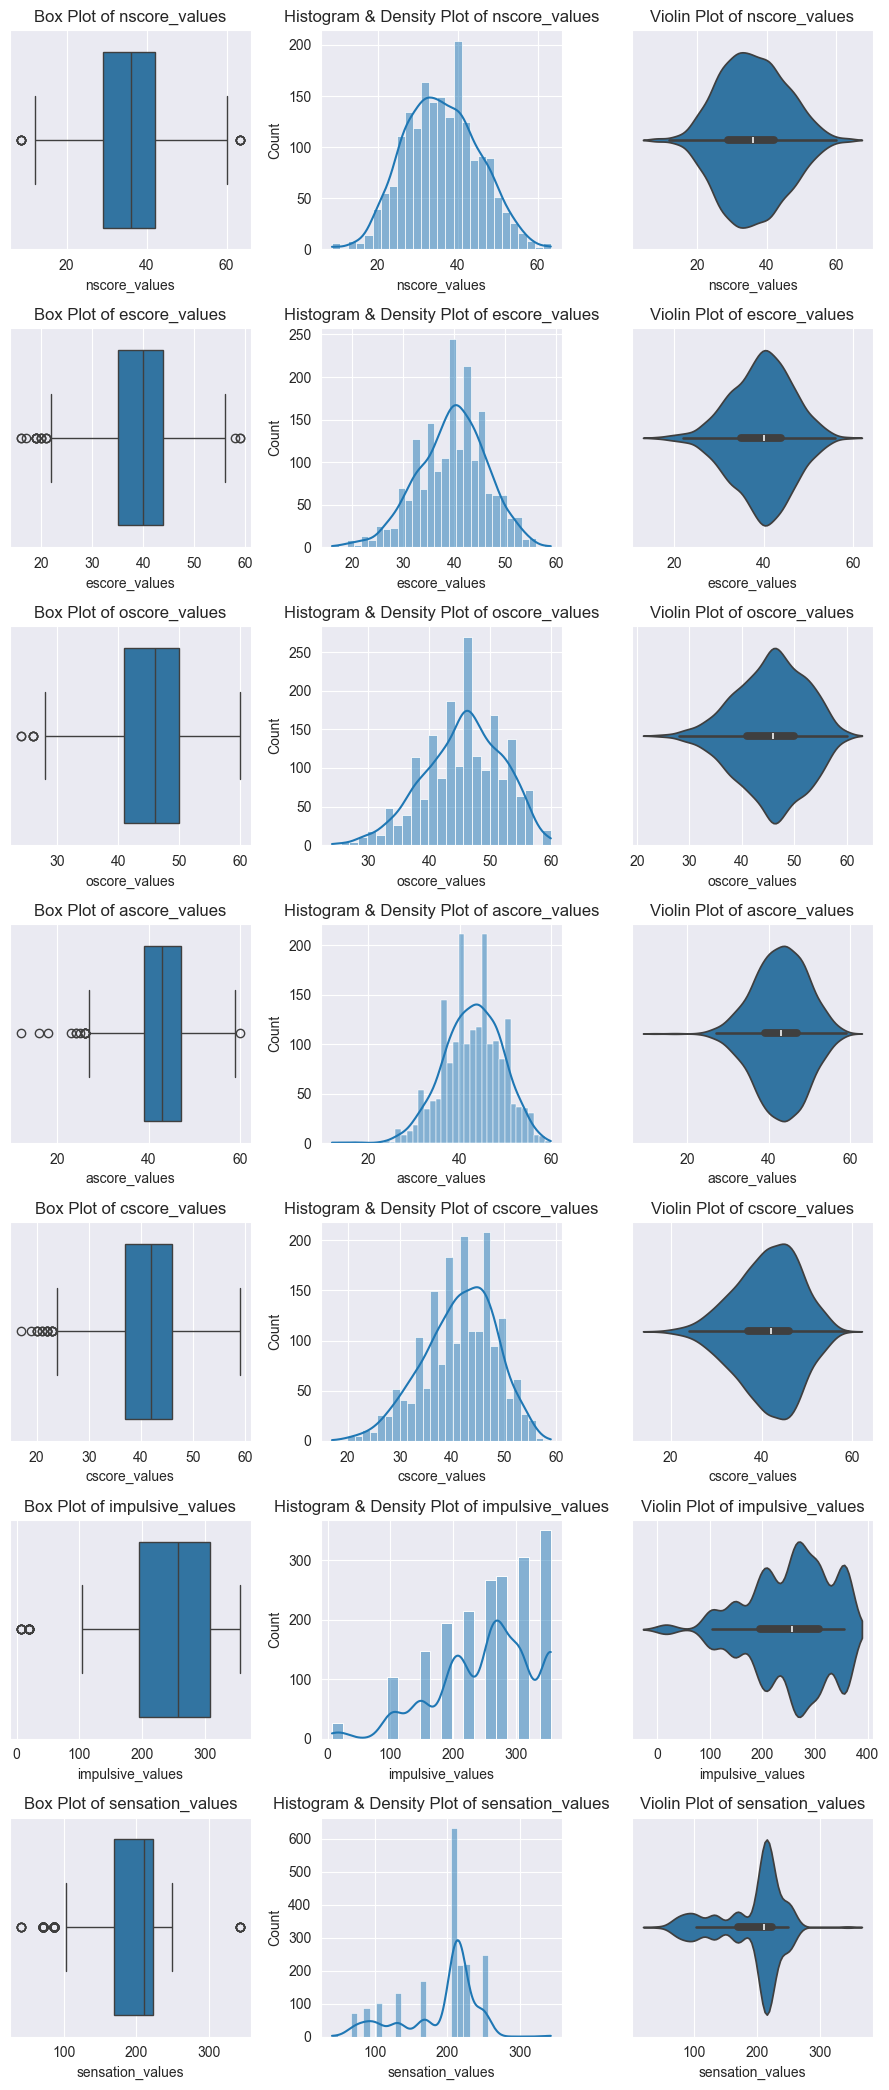

In [682]:
# Set up the subplots grid
num_plots = len(numeric_columns)
num_cols = 3  # Three types of plots for each column: Box, Histogram & Density, Violin

# Calculate the number of rows needed for all types of plots for each column
num_rows = len(numeric_columns)  # One row for each column type of plot

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 3, num_rows * 3))

# Flatten the axes array to make iteration easier
axes = axes.flatten()

# Iterate over each numeric column and plot each type in a separate cell
for i, col in enumerate(numeric_columns):
    # Box Plot
    sns.boxplot(x=df[col], ax=axes[i * num_cols])
    axes[i * num_cols].set_title(f'Box Plot of {col}')

    # Histogram & Density Plot
    sns.histplot(df[col], kde=True, ax=axes[i * num_cols + 1])
    axes[i * num_cols + 1].set_title(f'Histogram & Density Plot of {col}')

    # Violin Plot
    sns.violinplot(x=df[col], ax=axes[i * num_cols + 2])
    axes[i * num_cols + 2].set_title(f'Violin Plot of {col}')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()  # Detailed and informative display of key dataset information.

In [683]:
def analyze_outliers(df):
    outlier_counts = {}
    
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:  # Check if the column is numeric
            # Calculate the first and third quartiles
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1  # Interquartile range
            
            # Define the bounds for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Count outliers using the defined bounds
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
            
            # Store the count of outliers in the dictionary
            outlier_counts[col] = outliers
    
    # Optionally, print the count of outliers for each column
    for col, count in outlier_counts.items():
        print(f"Number of outliers in {col}: {count}")
    
    return outlier_counts


In [684]:
outlier_counts = analyze_outliers(df)

Number of outliers in ID: 0
Number of outliers in nscore_values: 12
Number of outliers in escore_values: 18
Number of outliers in oscore_values: 6
Number of outliers in ascore_values: 15
Number of outliers in cscore_values: 17
Number of outliers in impulsive_values: 27
Number of outliers in sensation_values: 168


In [685]:
def remove_outliers(df, column_name, remove='both'):
    # Calculate the first and third quartiles
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile range

    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if remove == 'both':
        # Remove both upper and lower outliers
        return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    elif remove == 'upper':
        # Remove only upper outliers
        return df[df[column_name] <= upper_bound]
    elif remove == 'lower':
        # Remove only lower outliers
        return df[df[column_name] >= lower_bound]
    else:
        raise ValueError("Invalid value for remove. Use 'both', 'upper', or 'lower'.")

In [686]:
df = remove_outliers(df, 'oscore_values', remove='lower')

In [687]:
outlier_counts = analyze_outliers(df)

Number of outliers in ID: 0
Number of outliers in nscore_values: 12
Number of outliers in escore_values: 18
Number of outliers in oscore_values: 0
Number of outliers in ascore_values: 15
Number of outliers in cscore_values: 17
Number of outliers in impulsive_values: 27
Number of outliers in sensation_values: 164


In [688]:
# Advanced data exploration
non_numeric_stats = {}

for column in df.columns:
    data = df[column]

    print(column, data.dtype, pd.api.types.is_string_dtype(data.dtype))

    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(data.dtype):
        pass
    else:
        # Calculate value counts for each category in the column
        value_counts = data.value_counts()
        # Store the counts in the dictionary, ensuring all possible categories are represented
        non_numeric_stats[column] = value_counts


ID int64 False
age_values object True
gender_values object True
education_values object True
country_values object True
ethnicity_values object True
nscore_values float64 False
escore_values float64 False
oscore_values float64 False
ascore_values float64 False
cscore_values float64 False
impulsive_values float64 False
sensation_values float64 False
Alcohol_values object True
Amphet_values object True
Amyl_values object True
Benzos_values object True
Cannabis_values object True
Choc_values object True
Coke_values object True
Caff_values object True
Crack_values object True
Ecstasy_values object True
Heroin_values object True
Ketamine_values object True
Legalh_values object True
LSD_values object True
Meth_values object True
Mushrooms_values object True
Nicotine_values object True
Semer_values object True
VSA_values object True


In [689]:
df.head()

ID age_values gender_values                  education_values  \
0   1    35 - 44        Female  Professional Certificate/Diploma   
1   2    25 - 34          Male                  Doctorate Degree   
2   3    35 - 44          Male  Professional Certificate/Diploma   
3   4    18 - 24        Female                    Masters Degree   
4   5    35 - 44        Female                  Doctorate Degree   

  country_values   ethnicity_values  nscore_values  escore_values  \
0             UK  Mixed-White/Asian           39.0           36.0   
1             UK              White           29.0           52.0   
2             UK              White           31.0           45.0   
3             UK              White           34.0           34.0   
4             UK              White           43.0           28.0   

   oscore_values  ascore_values  ...          Ecstasy_values  Heroin_values  \
0           42.0           37.0  ...              Never Used     Never Used   
1           55.0           48.0  ...      Used in Last Month     Never Used   
2           40.0           32.0  ...              Never Used     Never Used   
3           46.0           47.0  ...              Never Used     Never Used   
4           43.0           41.0  ...  Used over a Decade Ago     Never Used   

       Ketamine_values           Legalh_values           LSD_values  \
0           Never Used              Never Used           Never Used   
1  Used in Last Decade              Never Used  Used in Last Decade   
2           Never Used              Never Used           Never Used   
3  Used in Last Decade              Never Used           Never Used   
4           Never Used  Used over a Decade Ago           Never Used   

         Meth_values        Mushrooms_values      Nicotine_values  \
0         Never Used              Never Used  Used in Last Decade   
1  Used in Last Year              Never Used   Used in Last Month   
2         Never Used  Used over a Decade Ago           Never Used   
3         Never Used              Never Used  Used in Last Decade   
4         Never Used     Used in Last Decade  Used in Last Decade   

  Semer_values  VSA_values  
0   Never Used  Never Used  
1   Never Used  Never Used  
2   Never Used  Never Used  
3   Never Used  Never Used  
4   Never Used  Never Used  

[5 rows x 32 columns]

In [690]:
def plot_categorical_data(df, column, mappings, colors='viridis'):

    # This took me like 2 hours :')
    if column in mappings:
        # Convert column to a categorical type with the specified order
        category_order = mappings[column]
        df[column] = pd.Categorical(df[column], categories=category_order.values(), ordered=True)
    
    counts = df[column].value_counts().sort_index()  # Get counts of each category in the specified order
    # print(counts)  # Print counts for verification
    
    if not counts.empty:
        # Create a bar chart using Plotly
        fig = go.Figure([go.Bar(x=counts.index, y=counts.values, text=counts.values,
                                textposition='auto', marker_color=counts.values, marker=dict(colorscale=colors))])
        fig.update_layout(title=f'Frequency Count for {column}',
                          xaxis_title='Category',
                          yaxis_title='Counts',
                          template='plotly_white')
        fig.show()
    else:
        print(f"No data to plot for {column}")

In [691]:

for column in categorical_columns:
    plot_categorical_data(df, column, mappings)

##  TASK 1.4: Dataset verification

In [692]:
def sanity_check(df):
    # Check for null/NaN values
    null_check = df.isnull().sum()
    null_columns = null_check[null_check > 0]

    if null_columns.empty:
        print("No null or NaN values found in the DataFrame.")
    else:
        print("Columns with null or NaN values found:")
        print(null_columns)

    # Check for outliers in each column
    for col in df.columns:
        outliers = detect_outliers(df[col])
        if outliers.any():
            print(f"Outliers found in column '{col}'.")
        else:
            print(f"No outliers found in column '{col}'.")

    # Check for duplicate rows
    if df.duplicated().any():
        print("Duplicate rows found in the DataFrame.")
    else:
        print("No duplicate rows found in the DataFrame.")

    # Check for duplicate columns
    duplicate_columns = df.columns[df.columns.duplicated()]
    if duplicate_columns.any():
        print(f"Duplicate columns found: {list(duplicate_columns)}")
    else:
        print("No duplicate columns found in the DataFrame.")

In [693]:
sanity_check(df)

No null or NaN values found in the DataFrame.
No outliers found in column 'ID'.
No outliers found in column 'age_values'.
No outliers found in column 'gender_values'.
No outliers found in column 'education_values'.
No outliers found in column 'country_values'.
No outliers found in column 'ethnicity_values'.
Outliers found in column 'nscore_values'.
Outliers found in column 'escore_values'.
No outliers found in column 'oscore_values'.
Outliers found in column 'ascore_values'.
Outliers found in column 'cscore_values'.
Outliers found in column 'impulsive_values'.
Outliers found in column 'sensation_values'.
No outliers found in column 'Alcohol_values'.
No outliers found in column 'Amphet_values'.
No outliers found in column 'Amyl_values'.
No outliers found in column 'Benzos_values'.
No outliers found in column 'Cannabis_values'.
No outliers found in column 'Choc_values'.
No outliers found in column 'Coke_values'.
No outliers found in column 'Caff_values'.
No outliers found in column 'Crac

In [694]:
# Comprehensive use of techniques in identifying missing values

# Prepare data for the plot
complete_data = []

for column in df.columns:
    try:
        total_count = len(df[column])
        missing_count = df[column].isna().sum()

        # Check for division by zero
        if total_count == 0:
            raise ValueError(f'No data available in column {column}')

        missing_percentage = (missing_count / total_count) * 100
        complete_percentage = 100 - missing_percentage

        complete_data.append({'Column': column, 'Complete Percentage': complete_percentage})

    except ValueError as ve:
        print(f'Error in column {column}: {ve}')
    except Exception as e:
        print(f'An unexpected error occurred for column {column}: {e}')

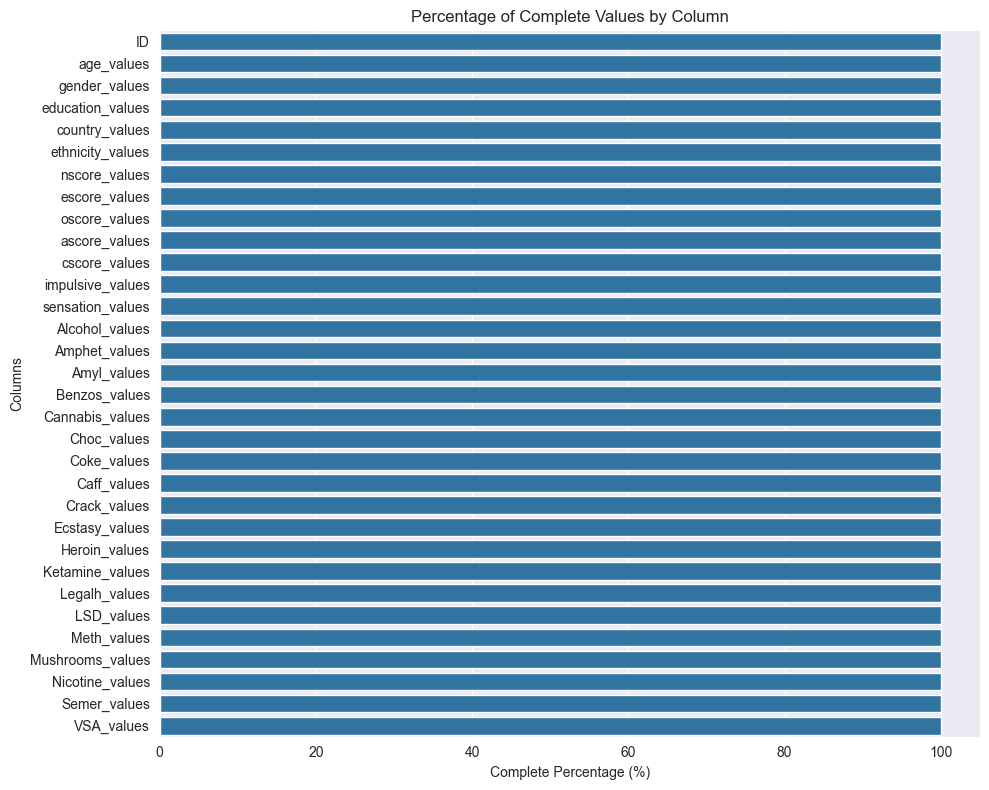

In [695]:
# Convert the list of dictionaries into a DataFrame for plotting
complete_df = pd.DataFrame(complete_data)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='Complete Percentage', y='Column',
            data=complete_df)  # https://seaborn.pydata.org/generated/seaborn.barplot.html
plt.title('Percentage of Complete Values by Column')
plt.xlabel('Complete Percentage (%)')
plt.ylabel('Columns')
plt.tight_layout()
plt.show()  # Detailed and informative display of key dataset information.

In [696]:
df.to_csv('drug_consumption_preprocessed.csv')

#  TASK 2: You must specify and answer three questions using appropriate data visualisation techniques

Q1: **What is the distribution of drug usage frequency among different age groups?**
- Context: Understanding how drug usage varies across different age demographics can help tailor prevention and intervention programs.
- Relevance: Age-specific trends can inform policy-making and targeted health campaigns.
Visualization Technique: Bar Chart - This will clearly show the frequency of drug usage across different age groups, making it easy to compare and identify trends.


Q2: **Is there a correlation between personality traits and drug usage frequency?**
- Context: Examining if certain personality traits are associated with higher or lower frequencies of drug usage can provide insights for psychological and medical professionals.
- Relevance: Helps in identifying at-risk individuals based on their personality profiles.
Visualization Technique: Scatter Plot Matrix (Pairs Plot) - This will allow for the visualization of relationships between multiple personality traits and drug usage frequencies simultaneously.


Q3: **What is the gender distribution in the frequency of drug usage?**
- Context: Understanding the gender-based differences in drug usage can help in developing gender-specific interventions and support programs.
- Relevance: Gender-targeted strategies can be more effective in addressing drug-related issues.
Visualization Technique: Pie Chart or Stacked Bar Chart - A pie chart can show the overall distribution, while a stacked bar chart can compare the frequency of usage across genders for each drug.

##  TASK 2.1: Q1 - 

In [697]:
demographics_columns  = ['age_values', 'gender_values', 'education_values', 'country_values', 'ethnicity_values']
personality_traits_scores_columns = ['nscore_values', 'escore_values', 'oscore_values', 'ascore_values', 'cscore_values', 'impulsive_values', 'sensation_values']
drug_columns = [col for col in df.columns if 'values' in col and col not in demographics_columns and col not in personality_traits_scores_columns]
drug_columns

['Alcohol_values',
 'Amphet_values',
 'Amyl_values',
 'Benzos_values',
 'Cannabis_values',
 'Choc_values',
 'Coke_values',
 'Caff_values',
 'Crack_values',
 'Ecstasy_values',
 'Heroin_values',
 'Ketamine_values',
 'Legalh_values',
 'LSD_values',
 'Meth_values',
 'Mushrooms_values',
 'Nicotine_values',
 'Semer_values',
 'VSA_values']

In [698]:
# Sort age groups based on the age_mapping order
age_order = [age_mapping[key] for key in sorted(age_mapping)]

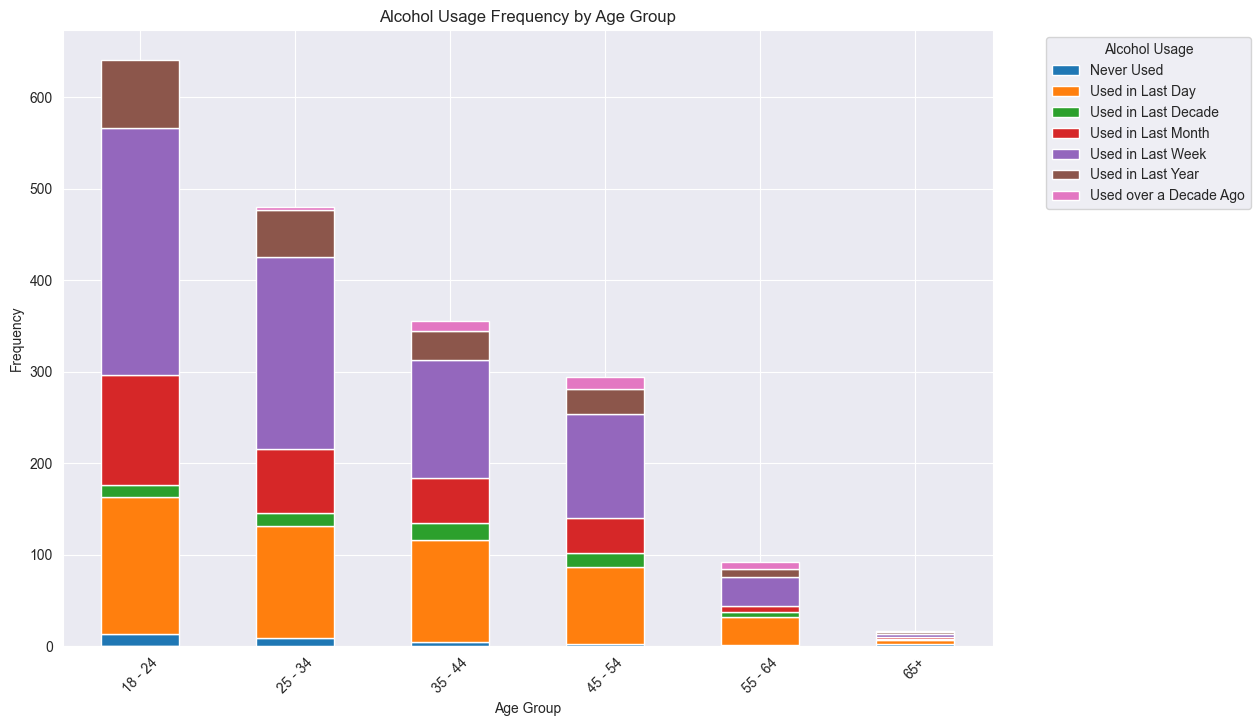

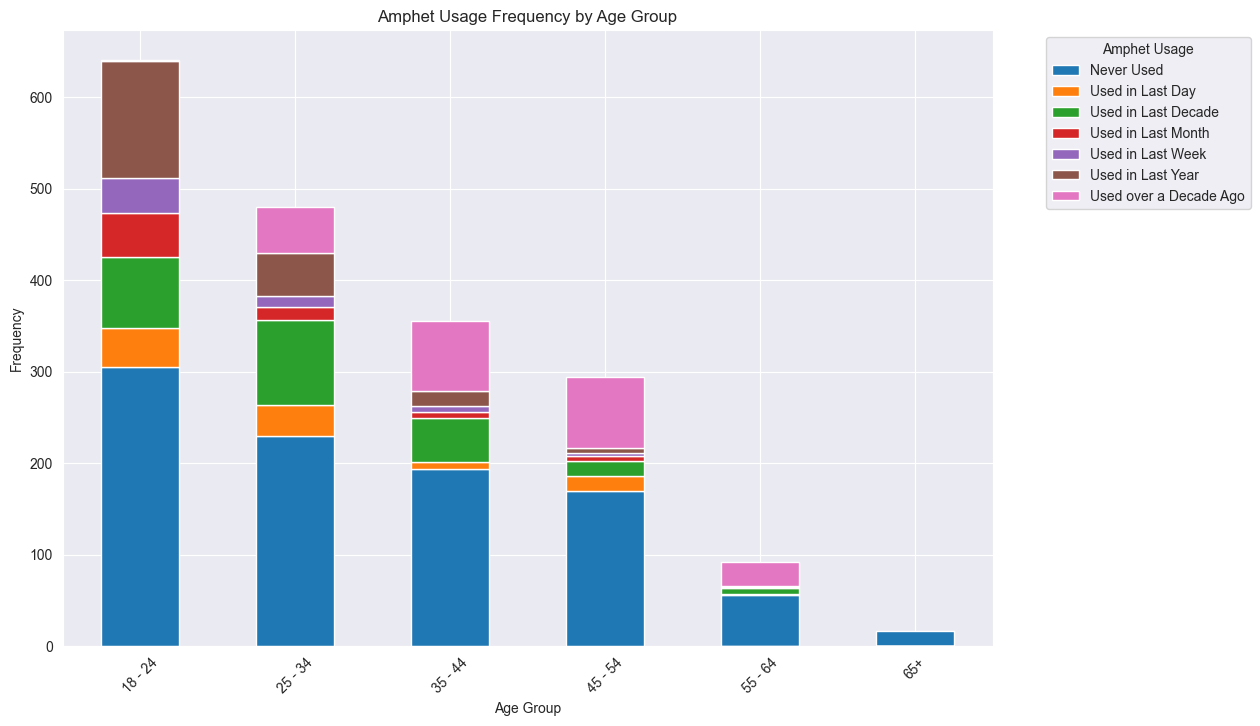

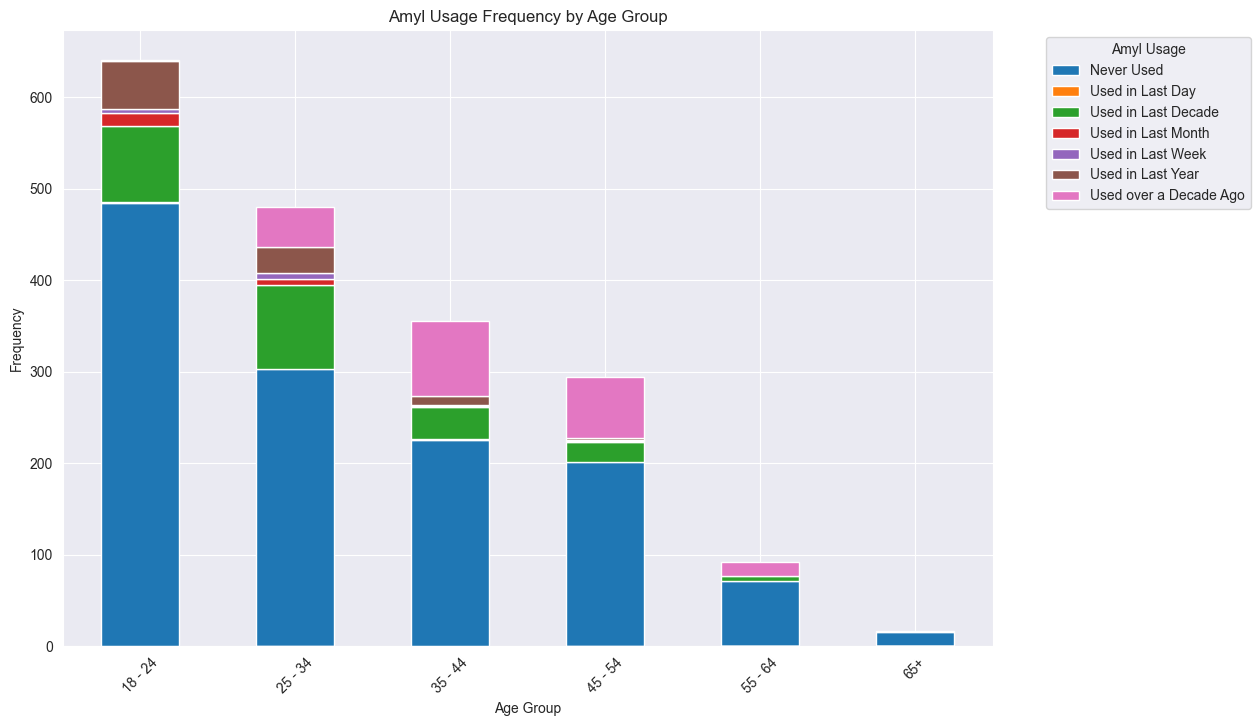

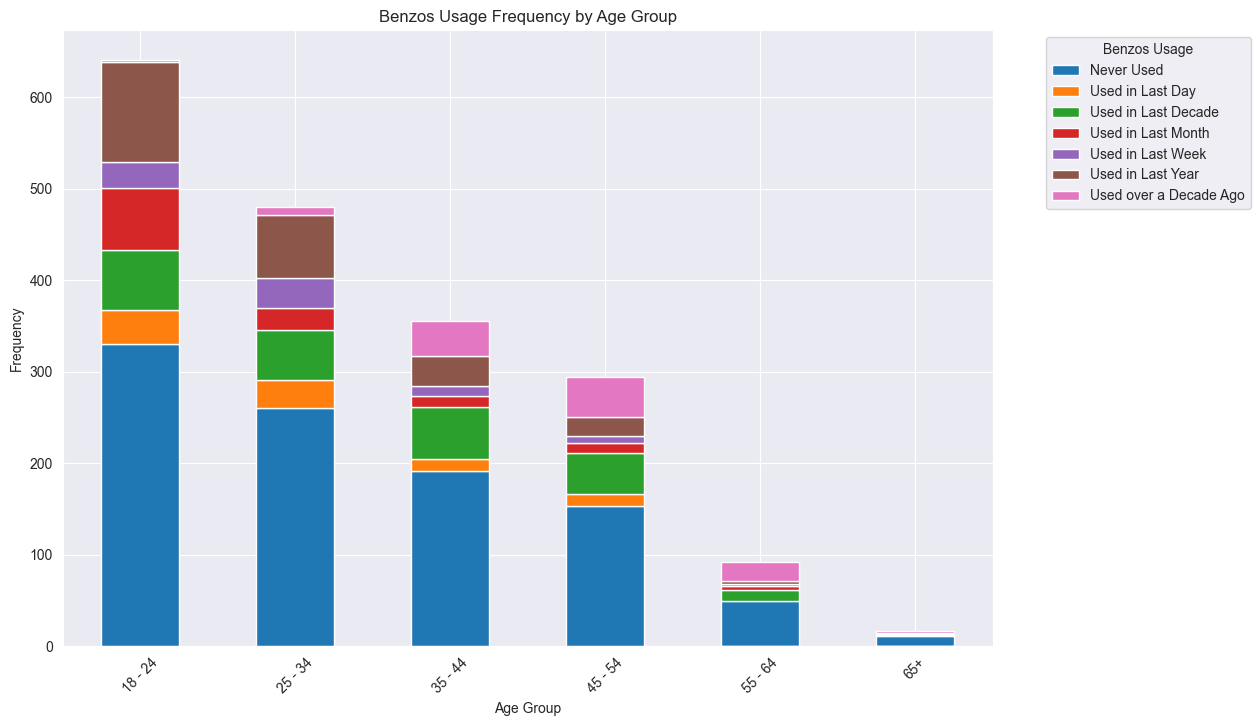

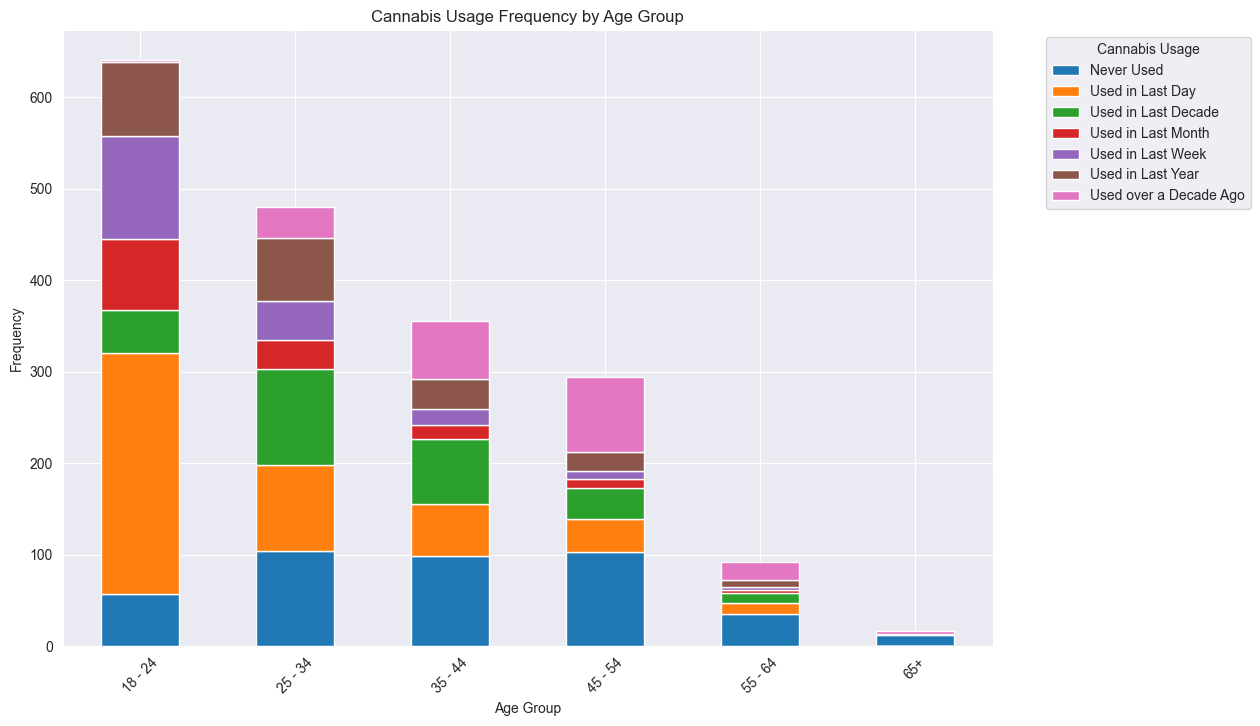

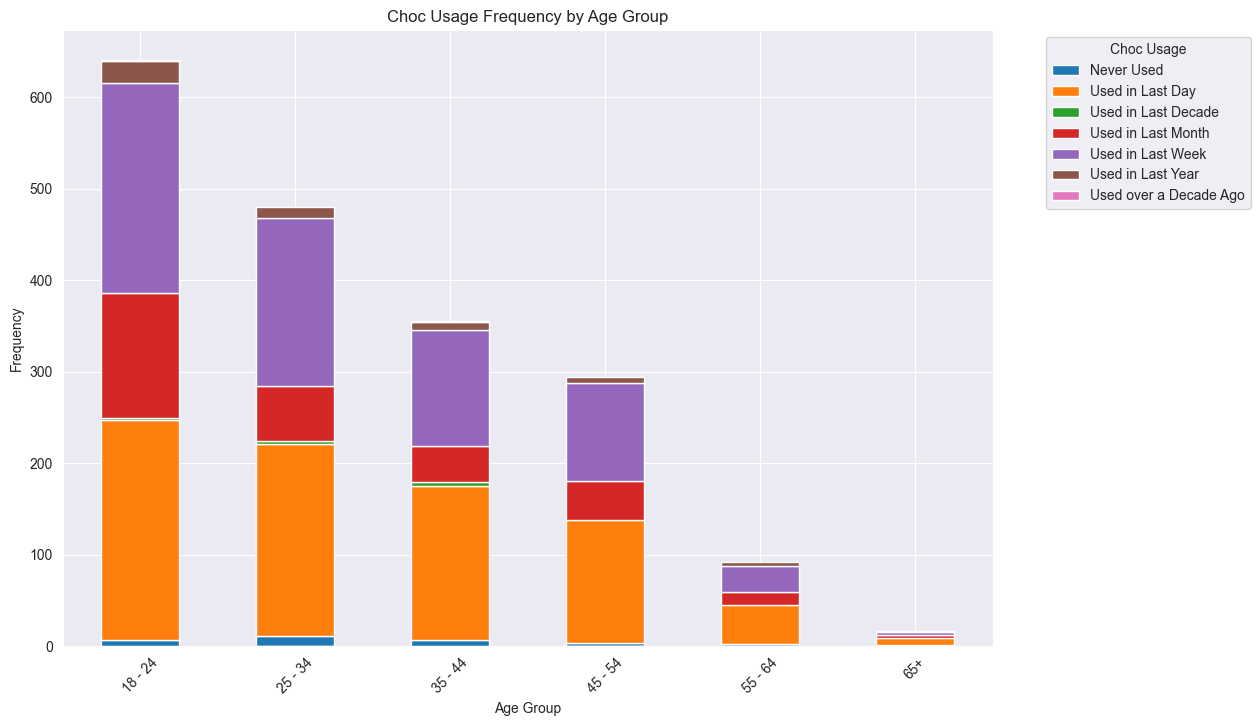

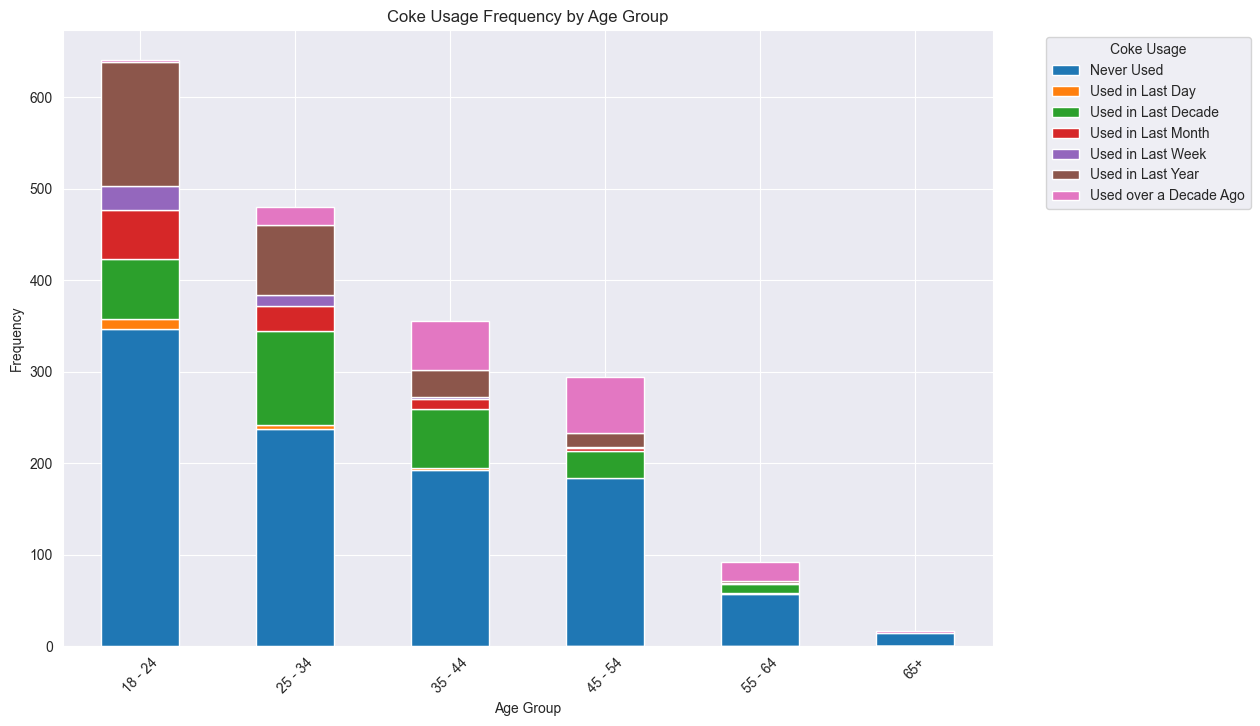

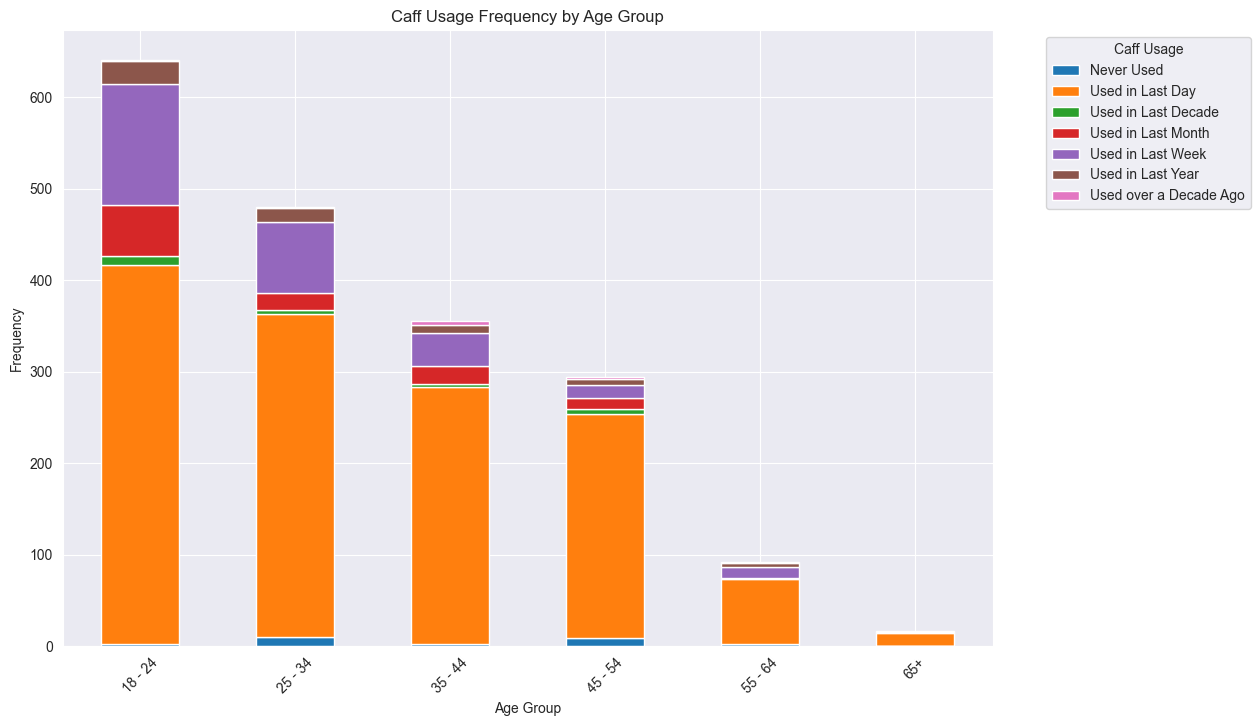

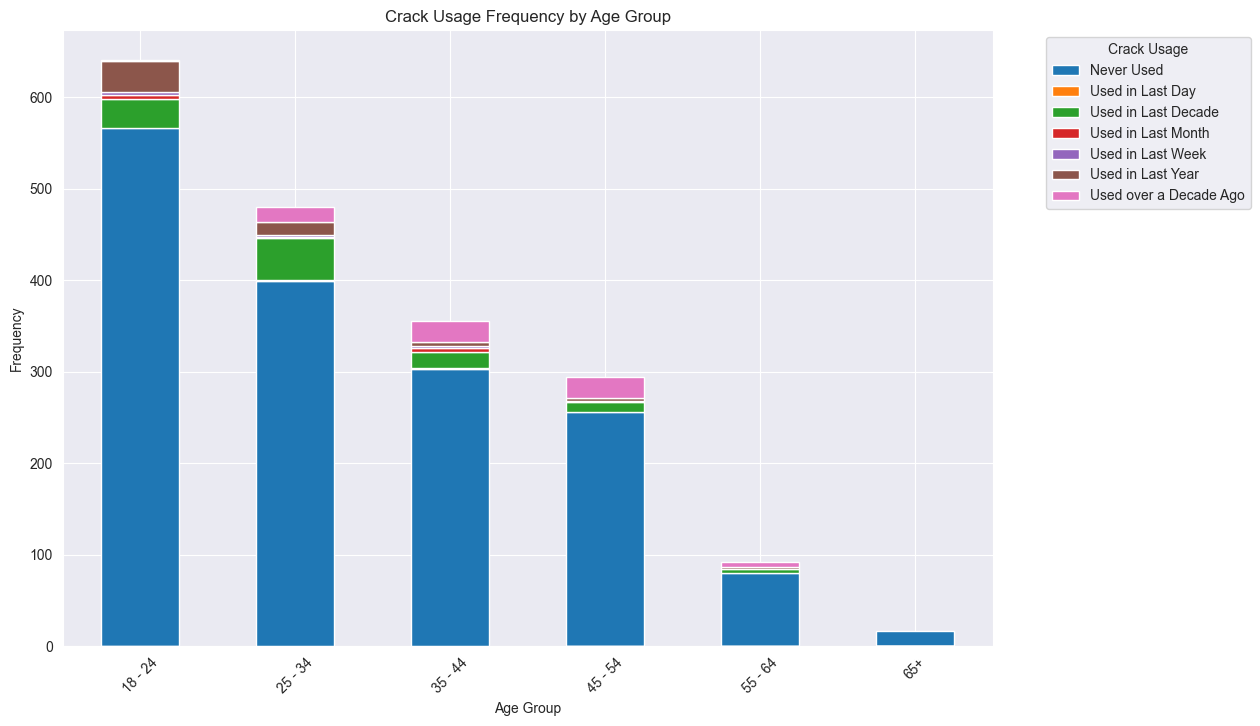

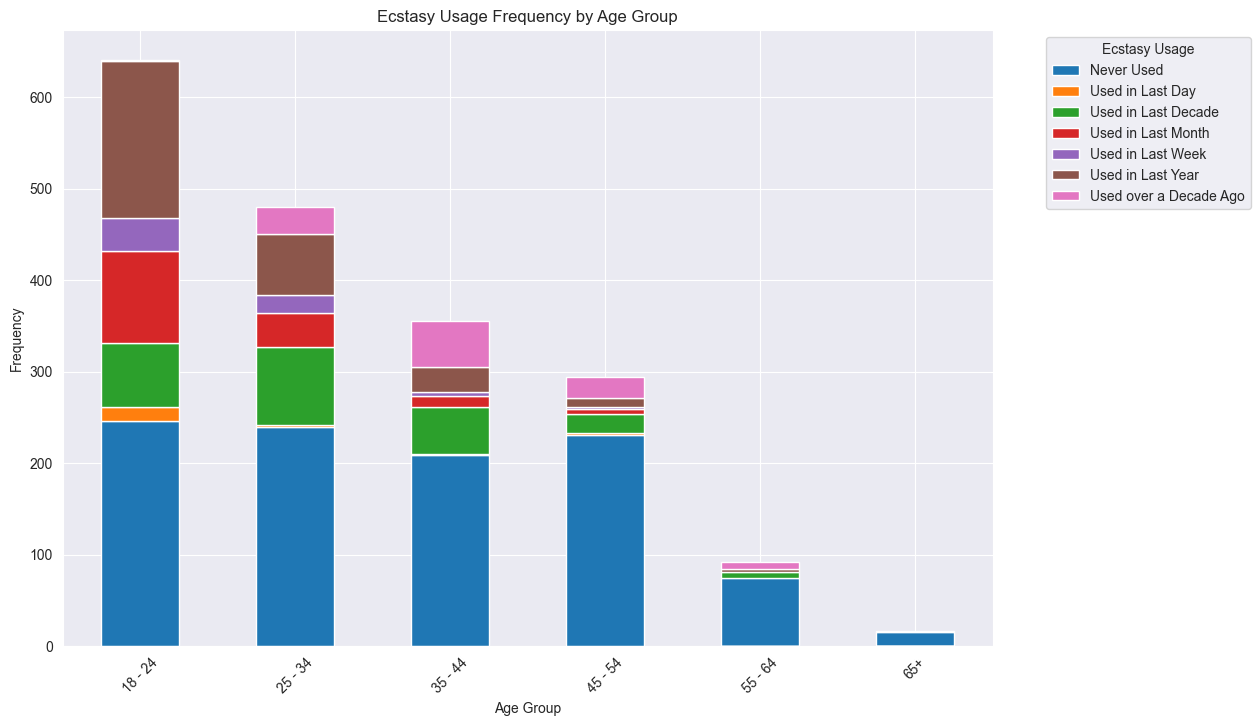

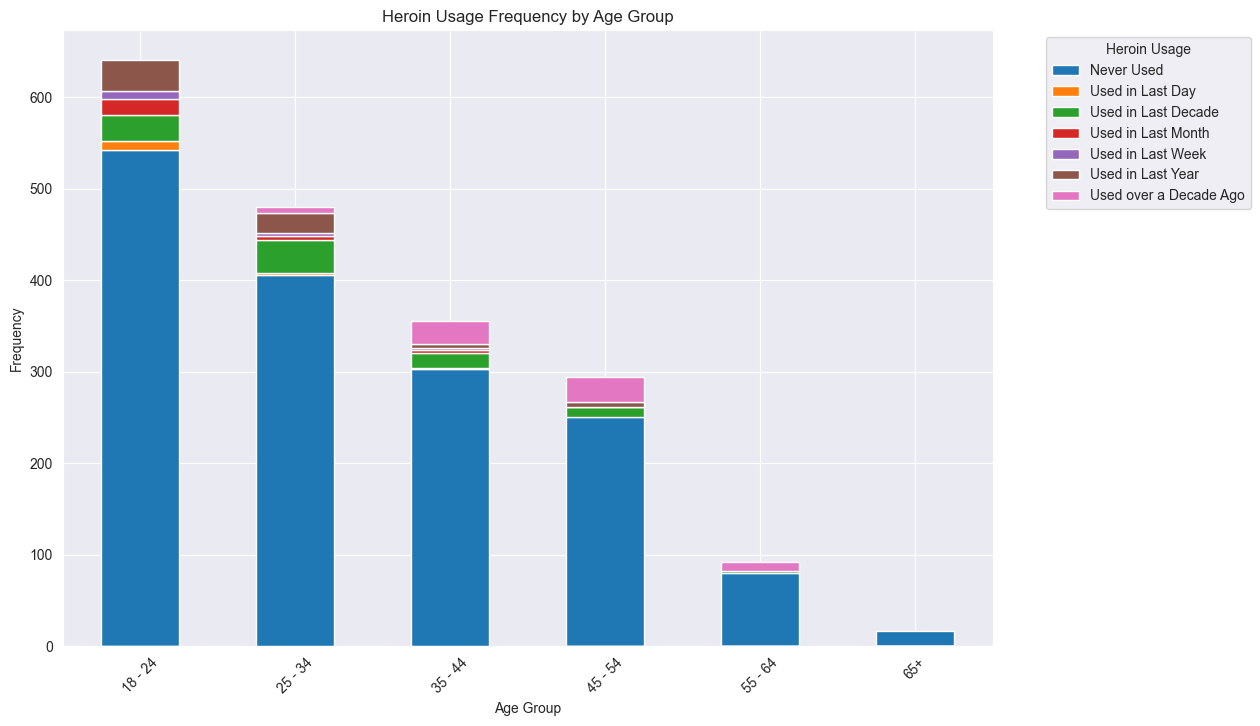

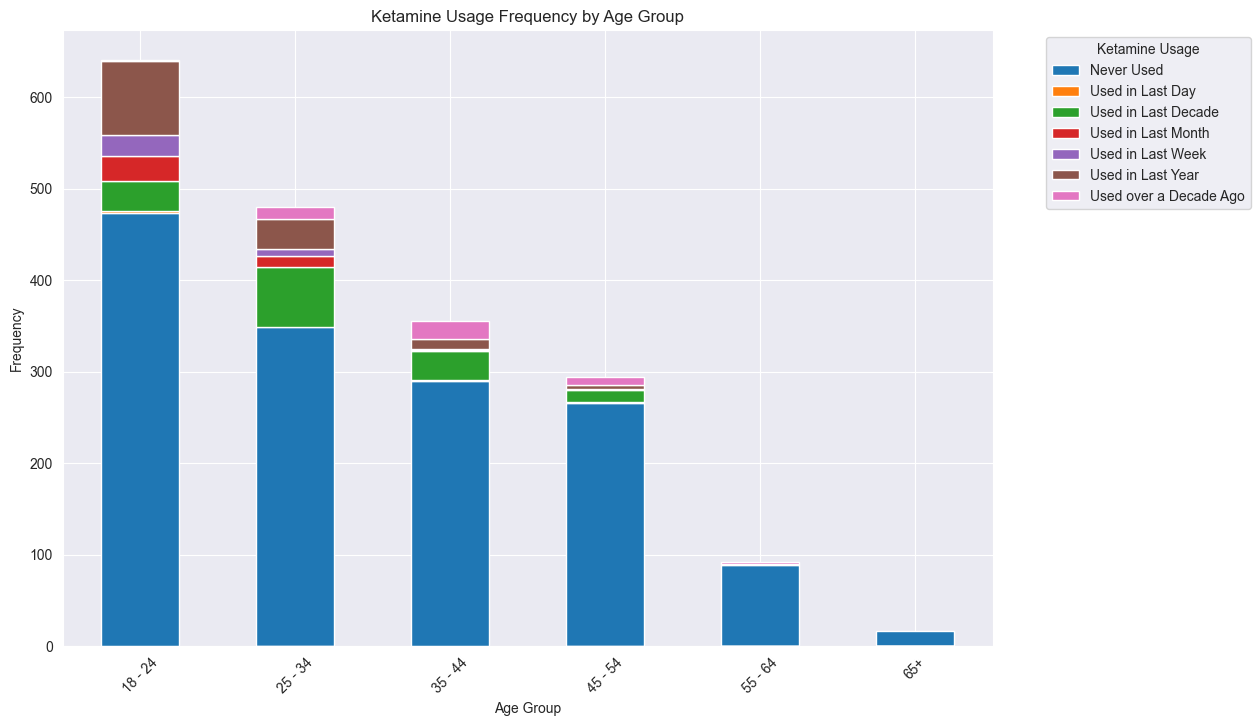

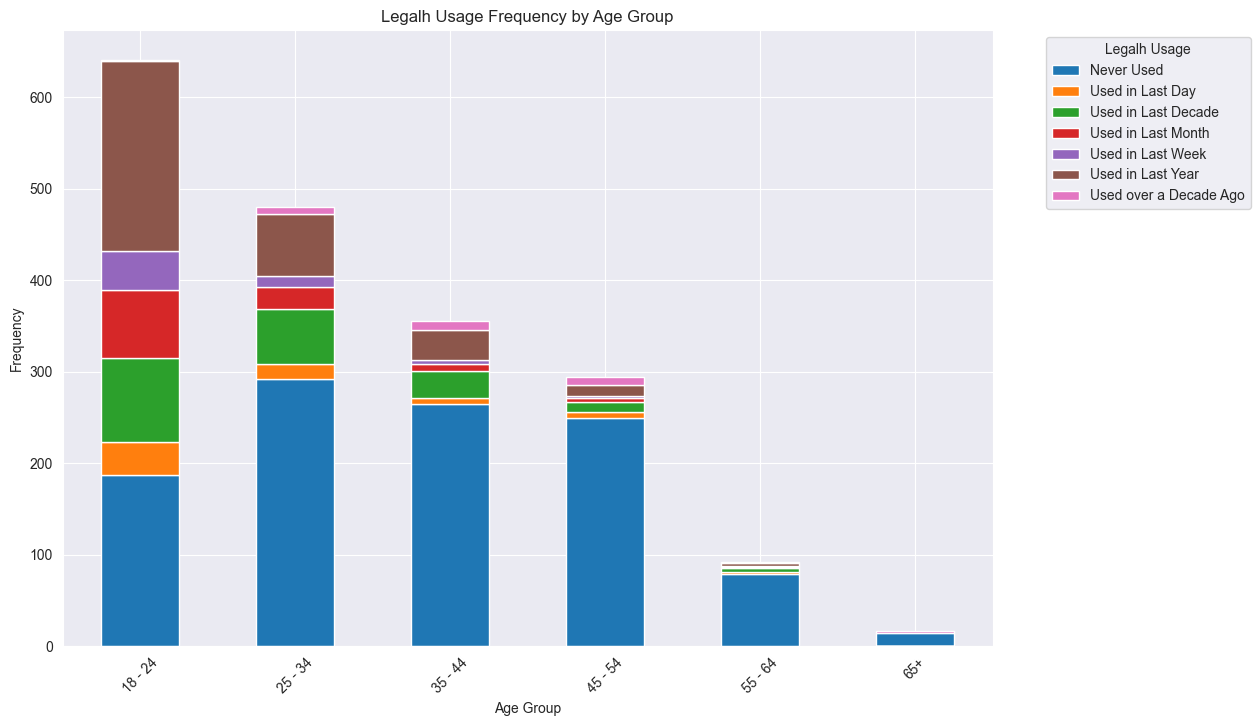

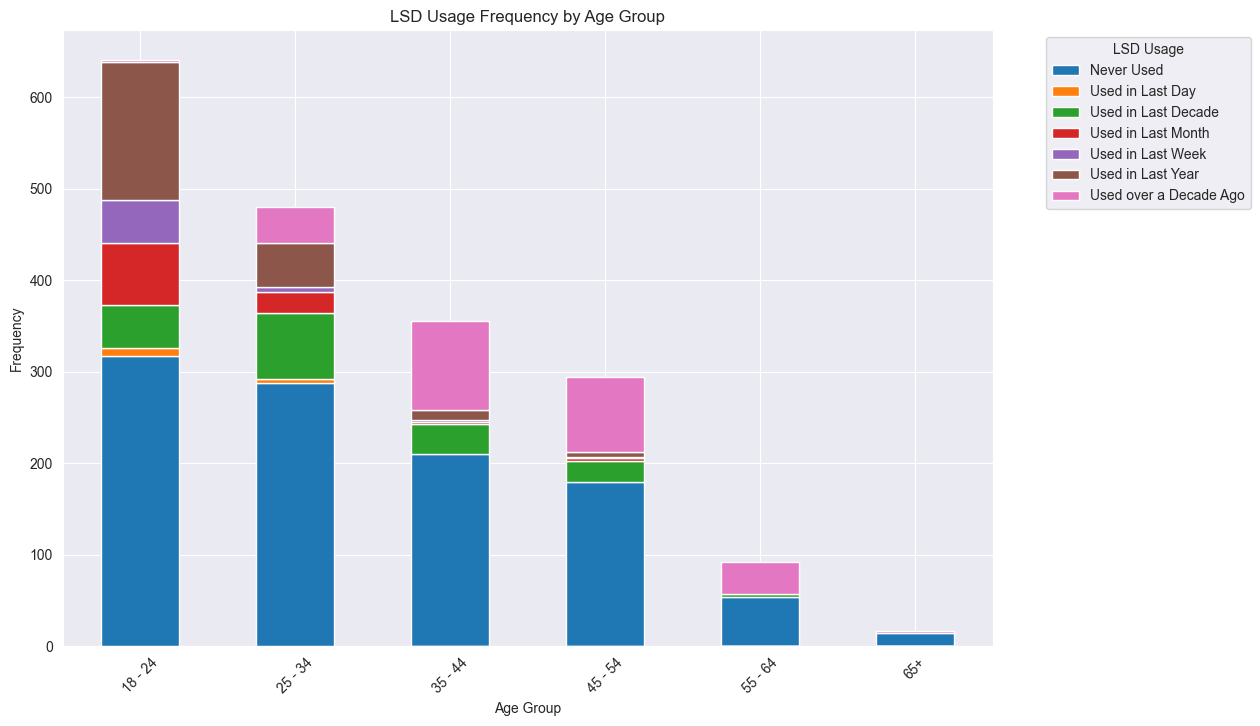

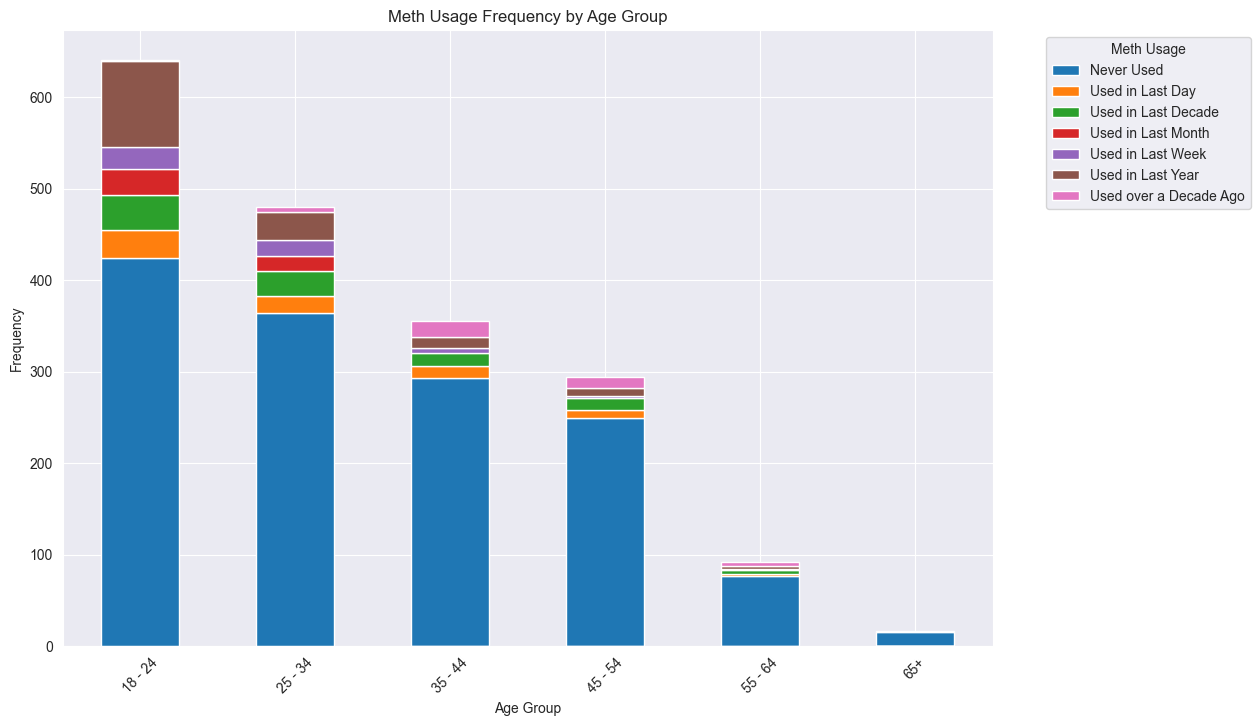

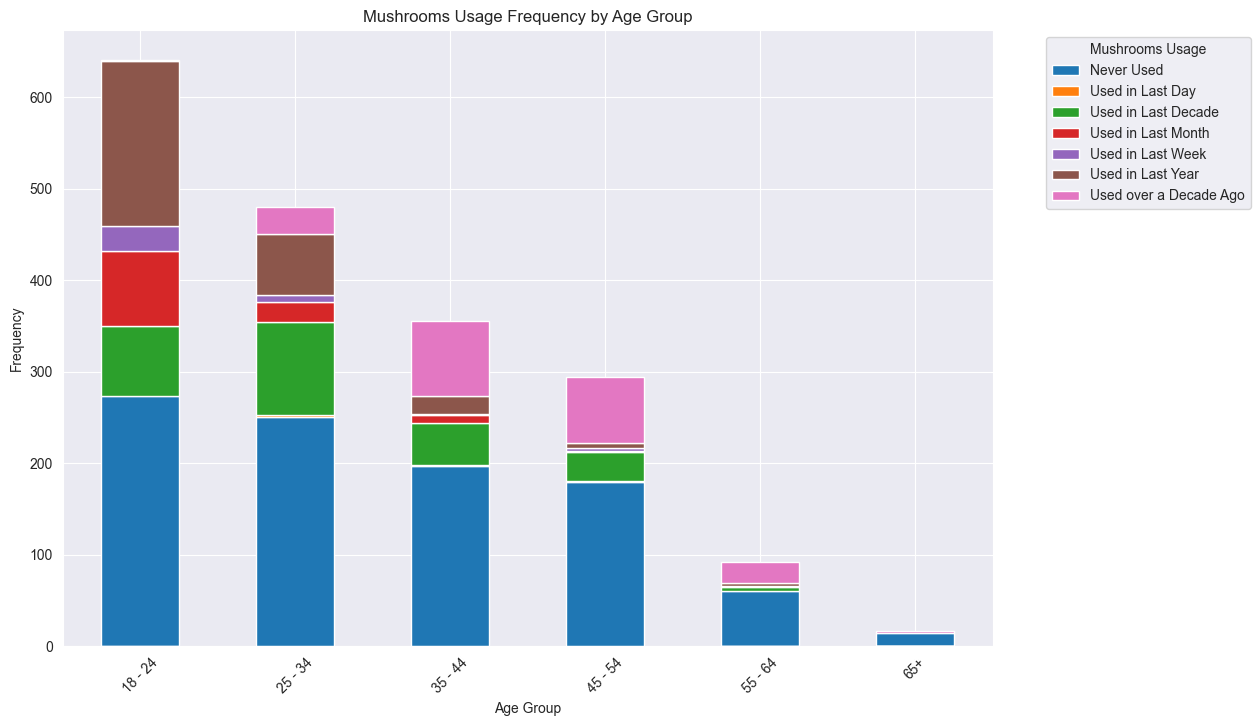

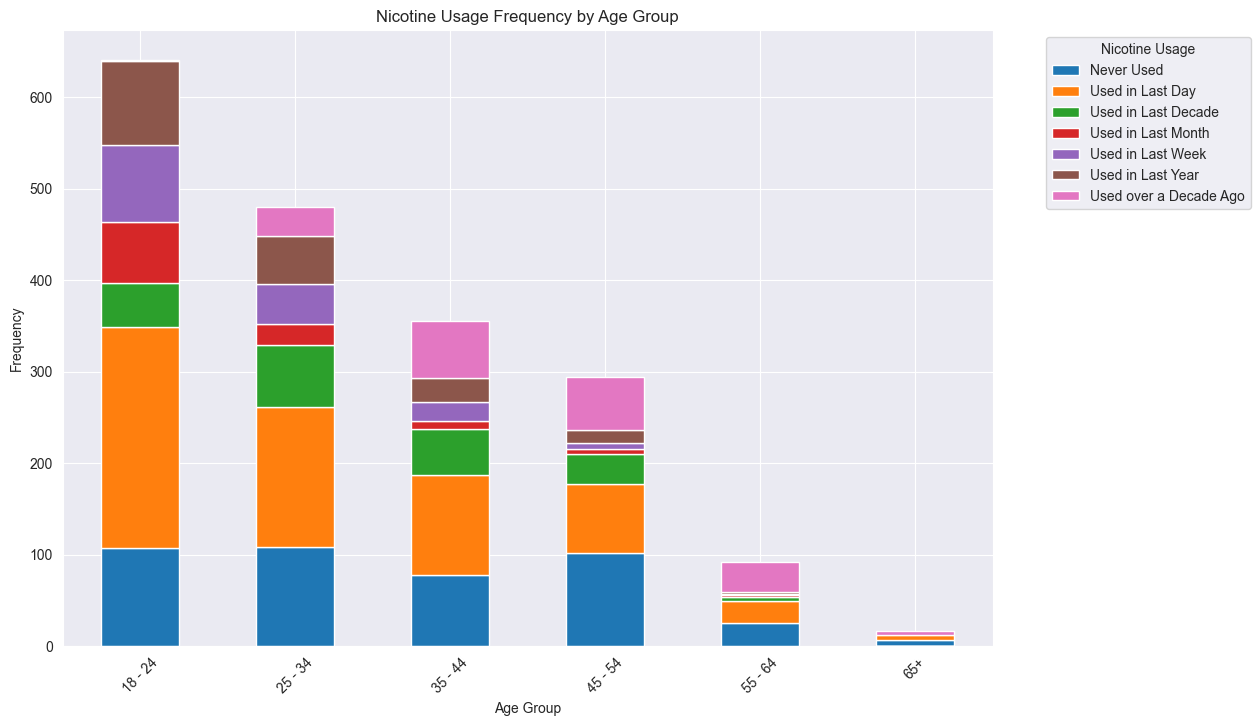

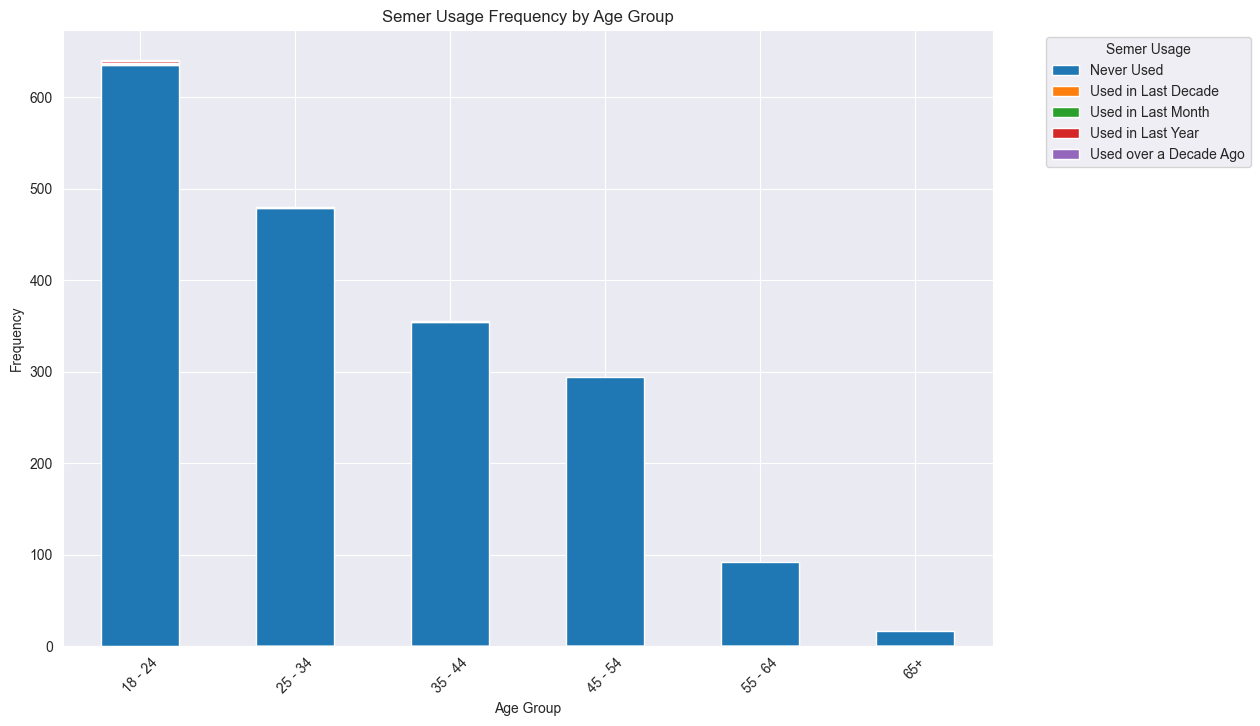

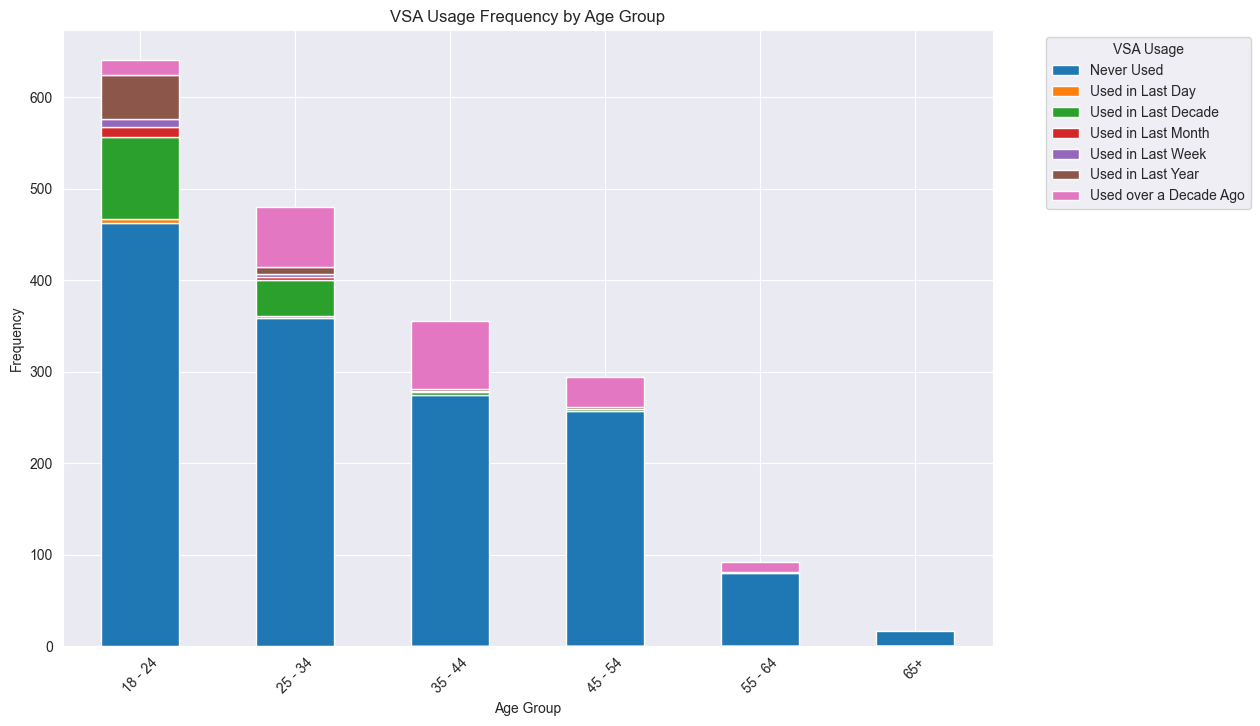

In [699]:
# Question 1: Distribution of Drug Usage Frequency by Age Group


# Bar Chart per Drug Usage by Age Group
for drug in drug_columns:
    drug_usage_age_group = df.groupby(['age_values', drug], observed=False).size().unstack(fill_value=0)
    drug_usage_age_group.plot(kind='bar', stacked=True, figsize=(12, 8))
    plt.title(f'{drug.replace("_values","")} Usage Frequency by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Frequency')
    plt.legend(title=f'{drug.replace("_values","")} Usage', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.show()

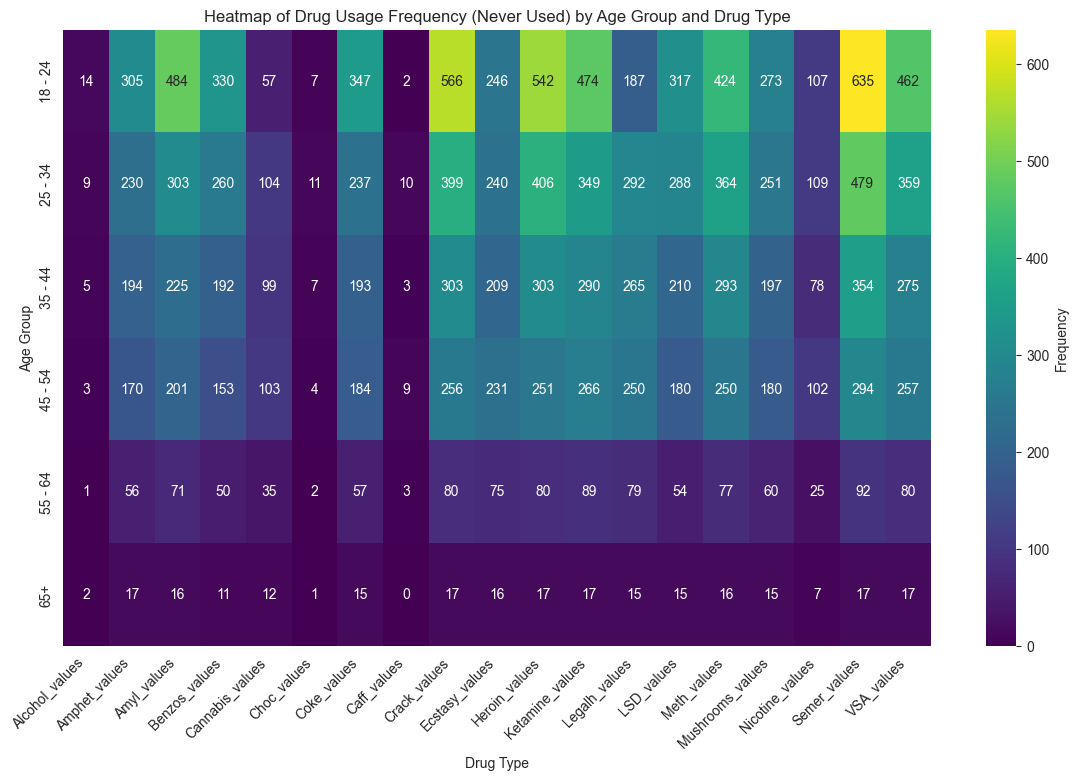

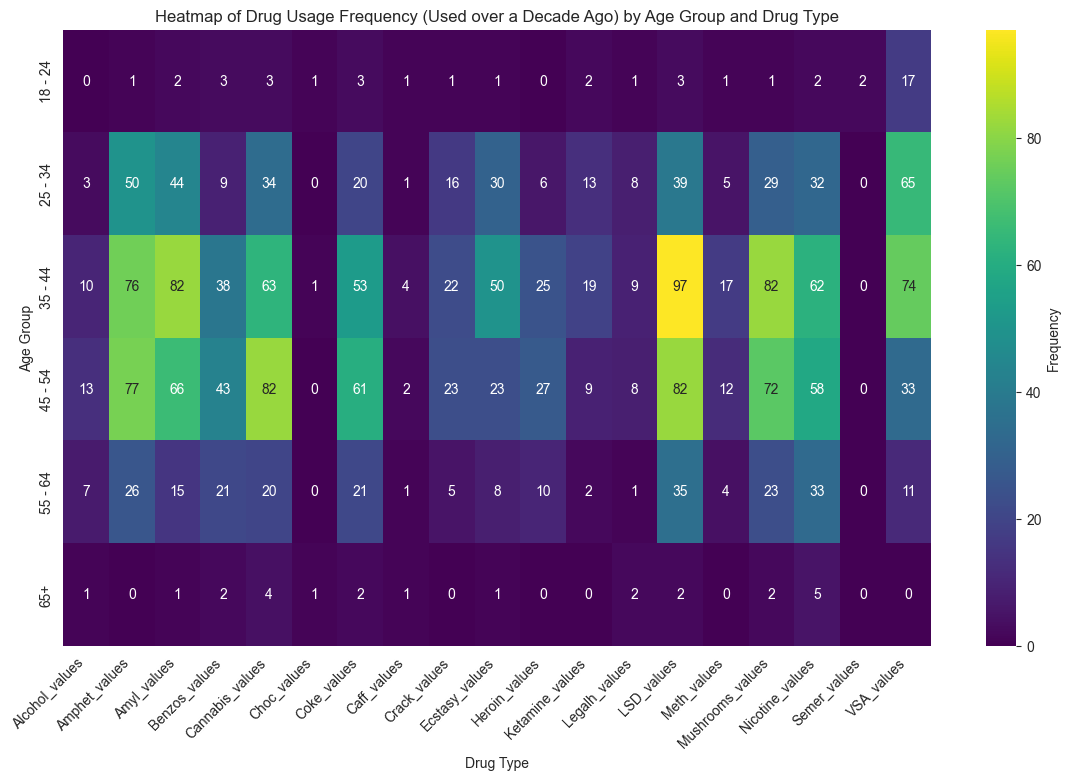

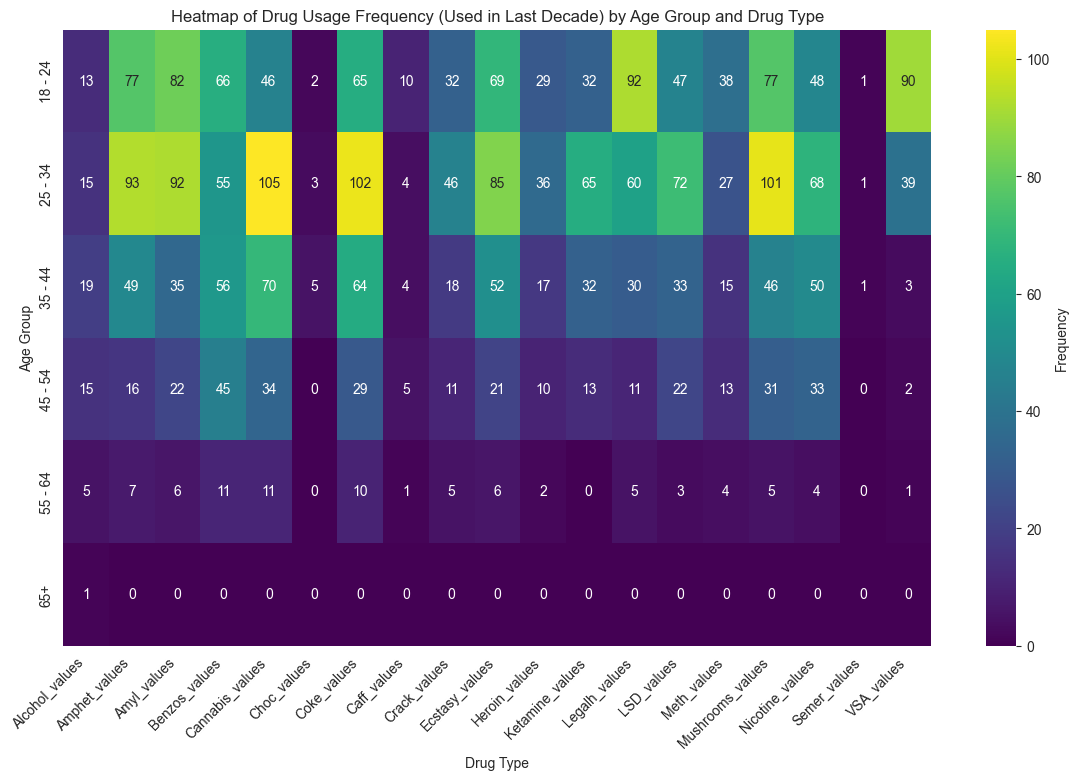

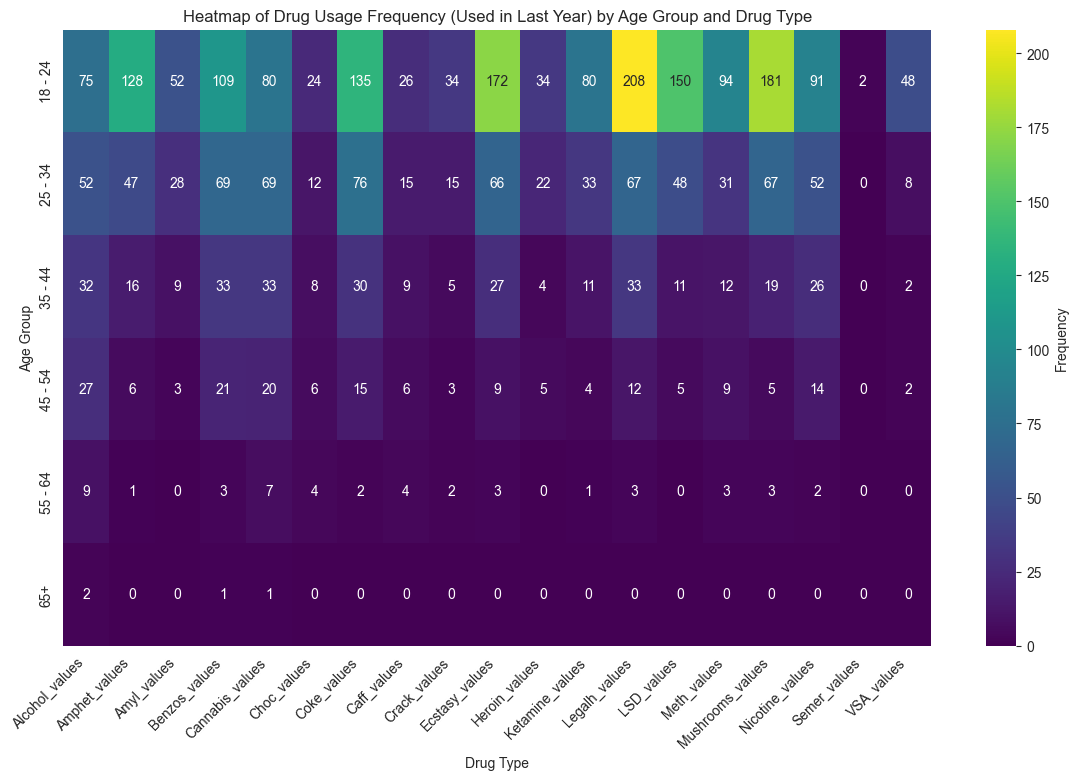

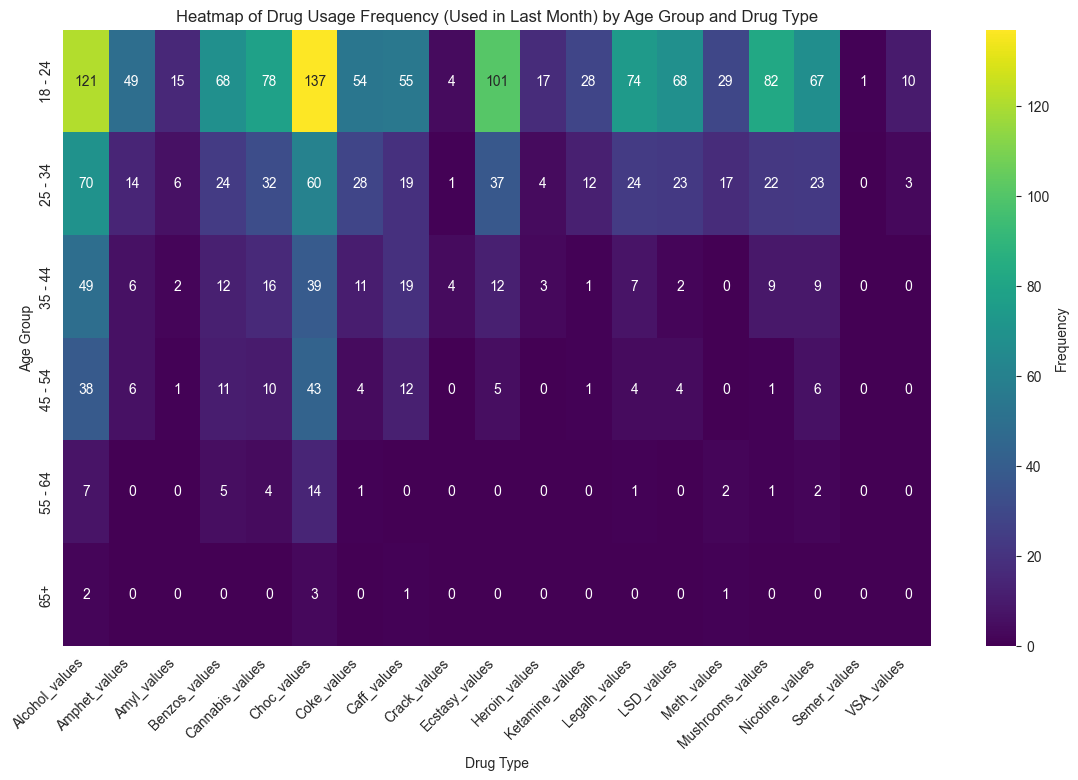

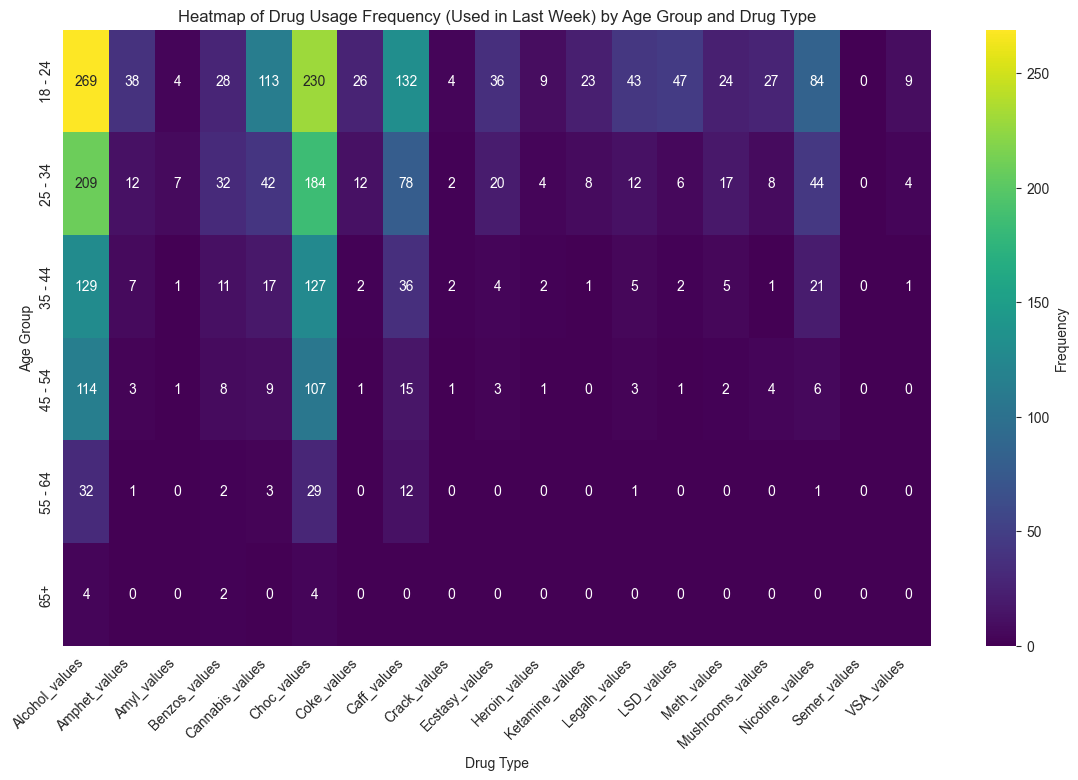

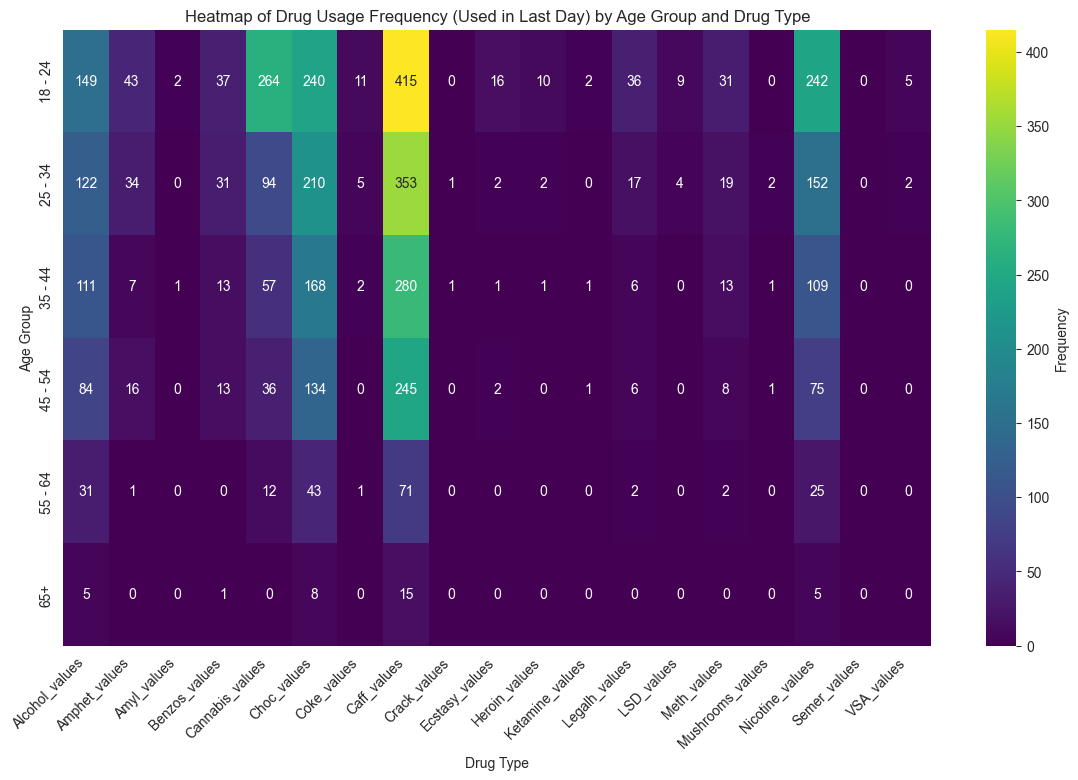

In [700]:
# Initialize the usage matrix for all age groups
usage_matrix = pd.DataFrame(0, index=age_order, columns=drug_columns)

for category in CATEGORIES.values():
    # Populate the usage matrix
    for age_key, age_group in age_mapping.items():
        age_group_data = df[df['age_values'] == age_group]
        for drug in drug_columns:
            usage_counts = age_group_data[drug].value_counts()
            # Aggregate the counts for the category "Used in Last Day"
            usage_matrix.loc[age_group, drug] = usage_counts.get(category, 0)
    
    # Plotting the combined heatmap for all age groups
    plt.figure(figsize=(14, 8))  # Adjust size as necessary
    sns.heatmap(usage_matrix, annot=True, fmt="d", cmap="viridis", cbar_kws={'label': 'Frequency'})
    plt.title(f'Heatmap of Drug Usage Frequency ({category}) by Age Group and Drug Type')
    plt.xlabel('Drug Type')
    plt.ylabel('Age Group')
    plt.xticks(rotation=45, ha='right')
    plt.show()

##  TASK 2.2: Q2 - 

In [706]:
personality_traits = ['nscore_values', 'escore_values', 'oscore_values', 'ascore_values', 'cscore_values']
drug_usage = ['Cannabis_values', 'Coke_values', 'Ecstasy_values', 'Nicotine_values']
usage_mapping = {
    "Never Used": 0, "Used over a Decade Ago": 1, "Used in Last Decade": 2,
    "Used in Last Year": 3, "Used in Last Month": 4, "Used in Last Week": 5,
    "Used in Last Day": 6
}

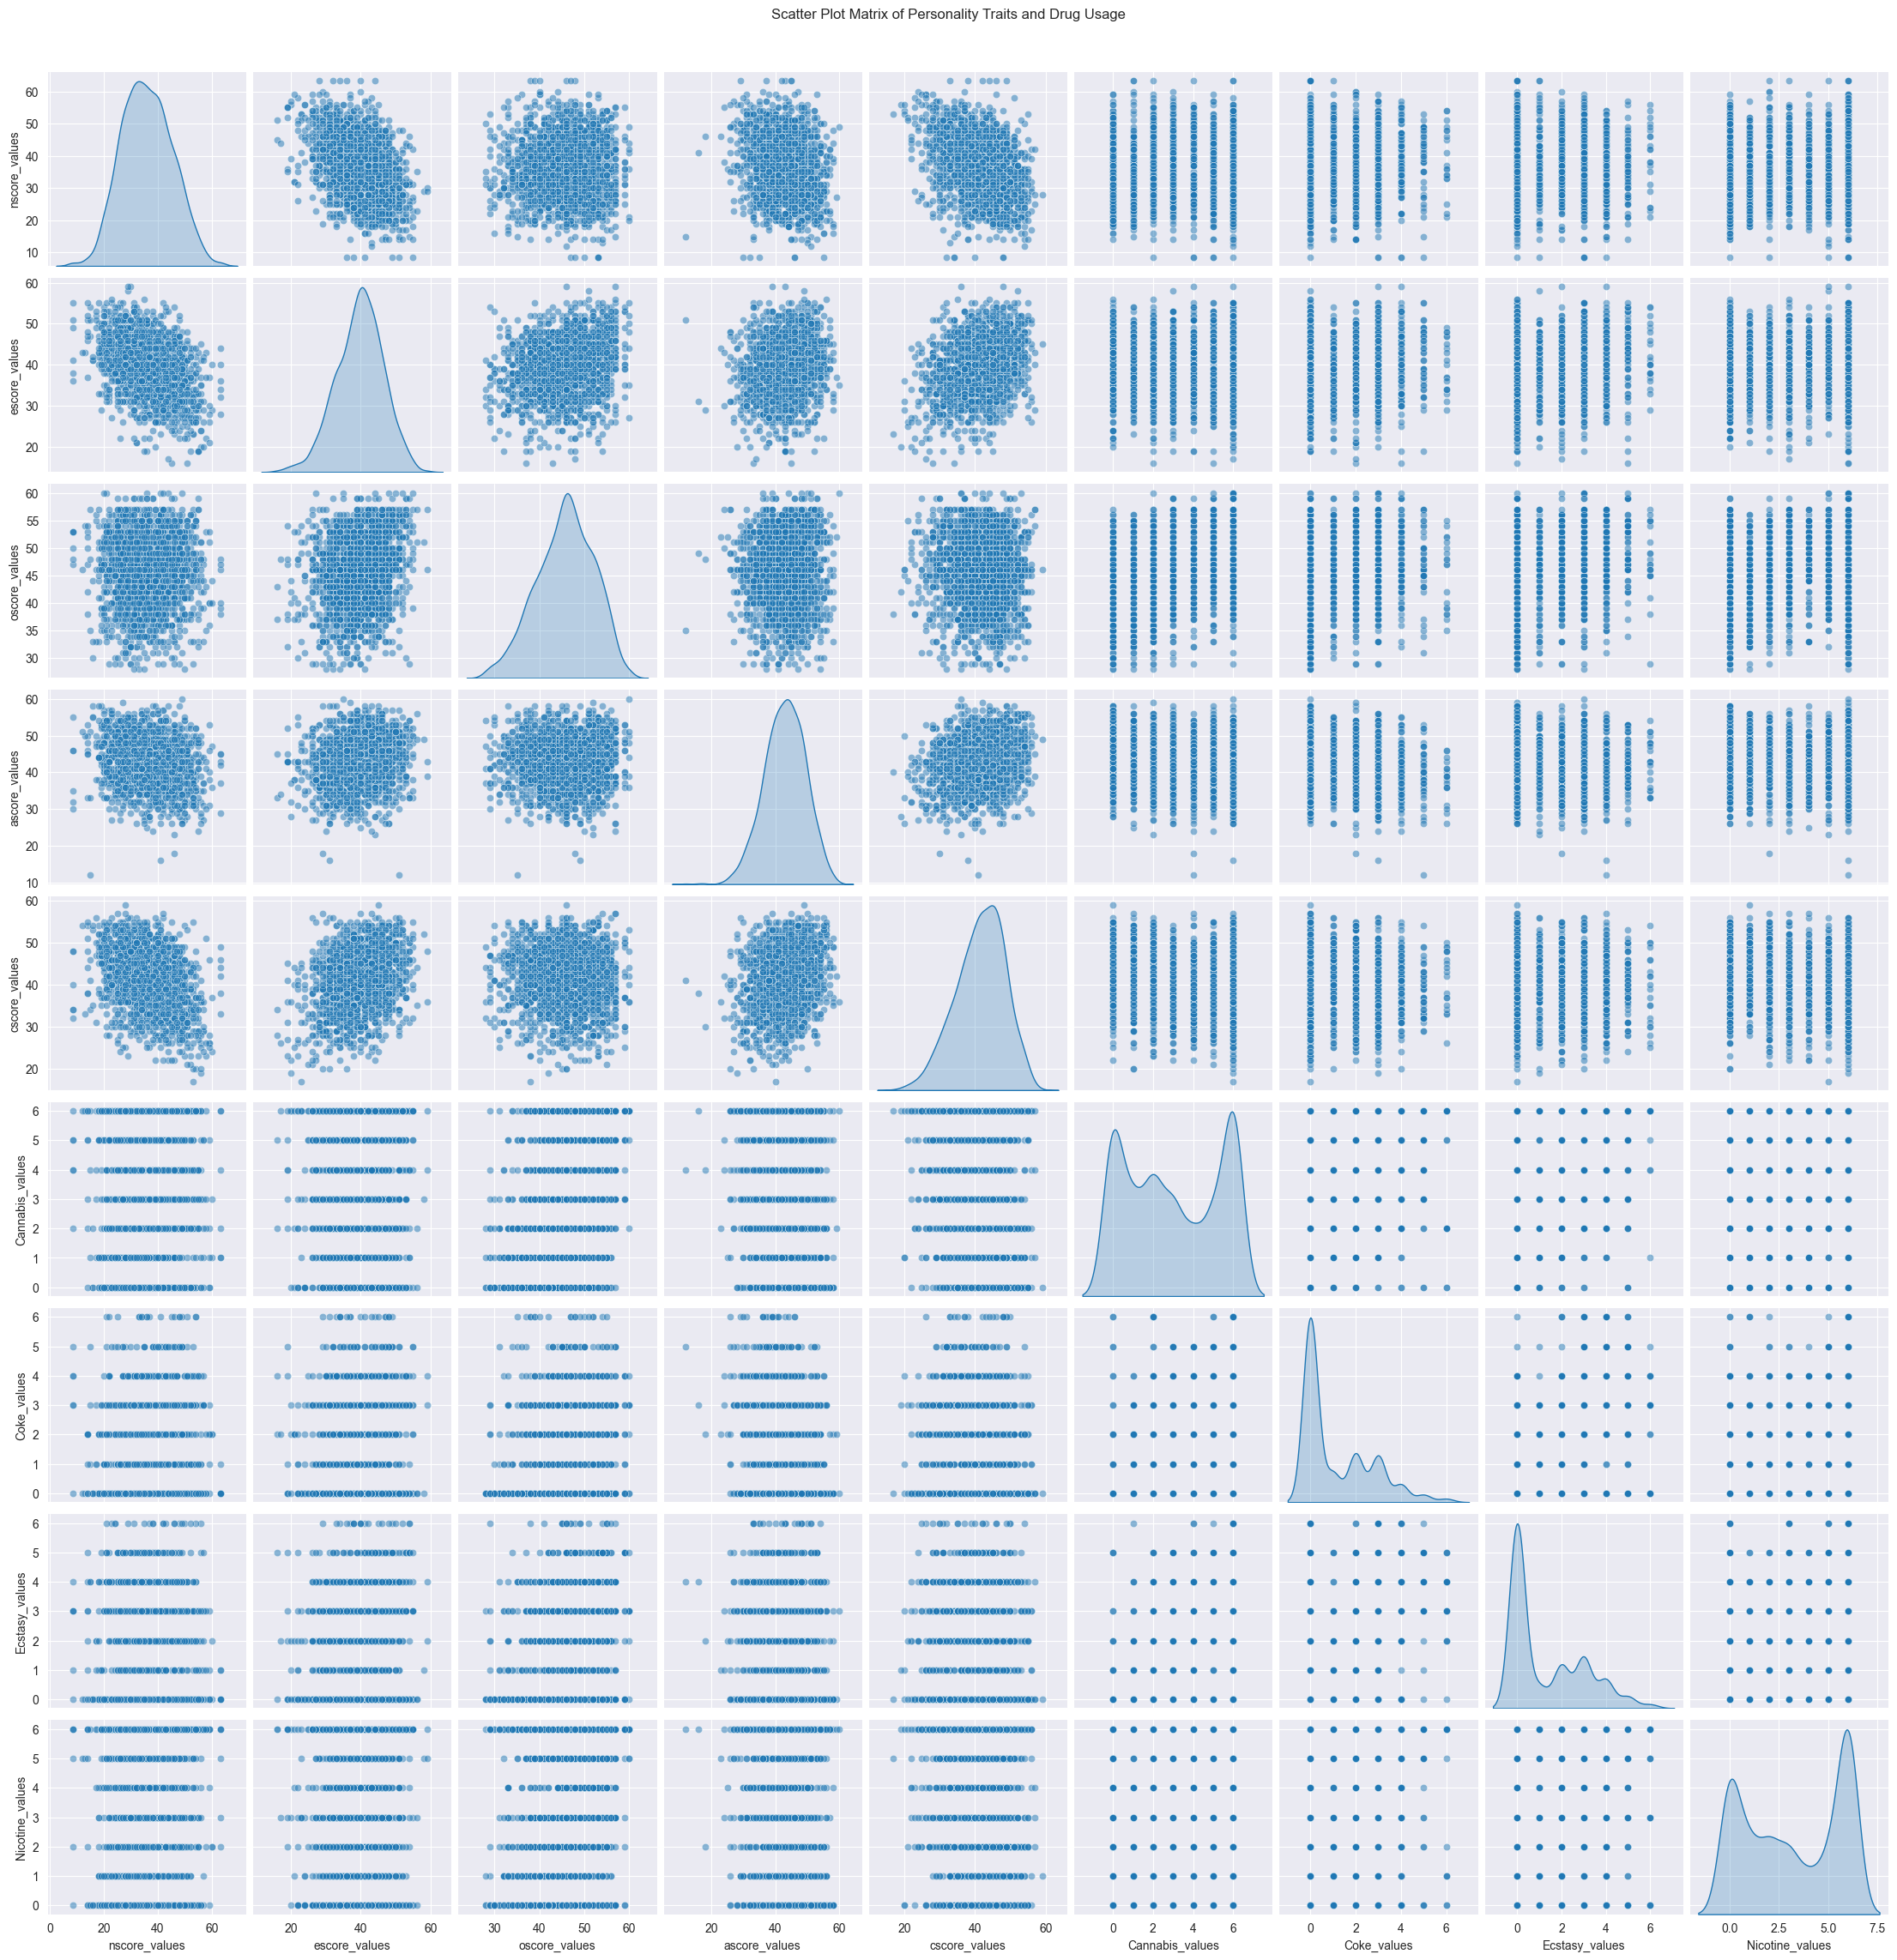

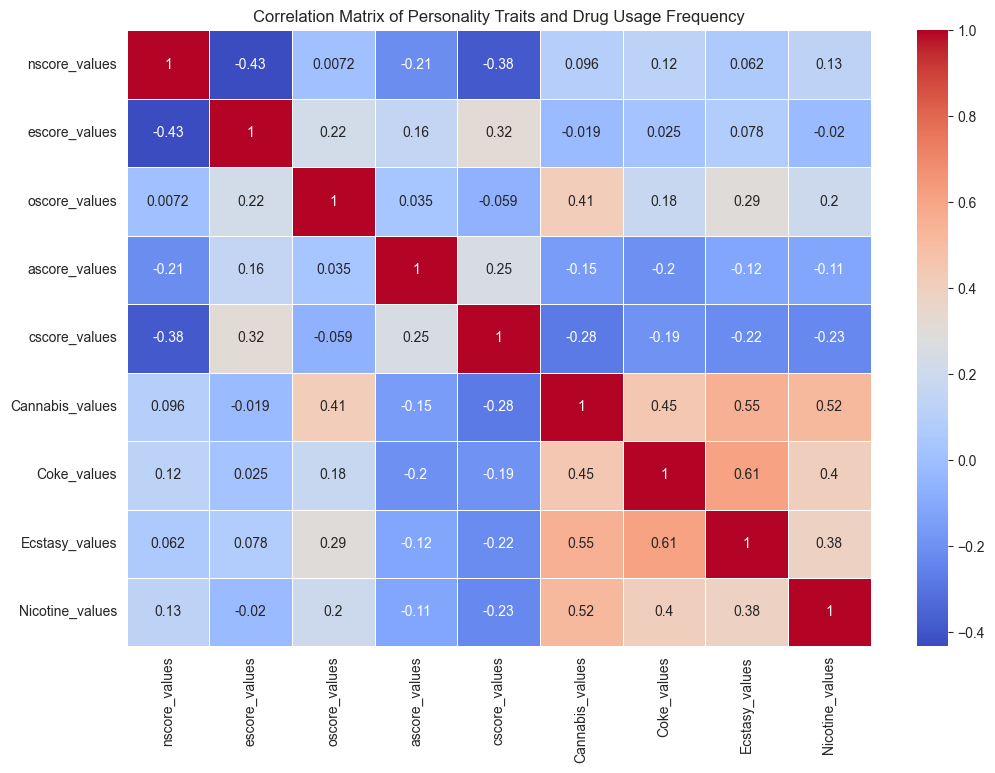

In [708]:
# Question 2: Correlation Between Personality Traits and Drug Usage Frequency


# Ensuring personality traits and drug usage columns are numeric
# Make a copy of the dataframe for mapping and conversion
data_mapped = df.copy()

# Apply the mapping to the drug usage columns
for col in drug_usage:
    data_mapped[col] = data_mapped[col].map(usage_mapping)

# Convert all relevant columns to numeric, coercing errors
for col in personality_traits + drug_usage:
    data_mapped[col] = pd.to_numeric(data_mapped[col], errors='coerce')

# Drop rows with missing values in the relevant columns
data_mapped_clean = data_mapped.dropna(subset=personality_traits + drug_usage)

# Scatter Plot Matrix (Pairs Plot)
sns.pairplot(data_mapped_clean[personality_traits + drug_usage], diag_kind='kde', kind='scatter', plot_kws={'alpha':0.5})
plt.suptitle('Scatter Plot Matrix of Personality Traits and Drug Usage', y=1.02)
plt.show()

# Correlation Matrix with Heatmap
correlation_matrix_clean = data_mapped_clean[personality_traits + drug_usage].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_clean, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Personality Traits and Drug Usage Frequency')
plt.show()

Correlation Matrix:
                  nscore_values  escore_values  oscore_values  ascore_values  \
nscore_values              NaN            NaN            NaN            NaN   
escore_values              NaN            NaN            NaN            NaN   
oscore_values              NaN            NaN            NaN            NaN   
ascore_values              NaN            NaN            NaN            NaN   
cscore_values              NaN            NaN            NaN            NaN   
Cannabis_values            NaN            NaN            NaN            NaN   
Coke_values                NaN            NaN            NaN            NaN   
Ecstasy_values             NaN            NaN            NaN            NaN   
Nicotine_values            NaN            NaN            NaN            NaN   

                 cscore_values  Cannabis_values  Coke_values  Ecstasy_values  \
nscore_values              NaN              NaN          NaN             NaN   
escore_values              N

/usr/local/anaconda3/envs/uts-pdpp/lib/python3.11/site-packages/seaborn/matrix.py:202: RuntimeWarning:

All-NaN slice encountered

/usr/local/anaconda3/envs/uts-pdpp/lib/python3.11/site-packages/seaborn/matrix.py:207: RuntimeWarning:

All-NaN slice encountered



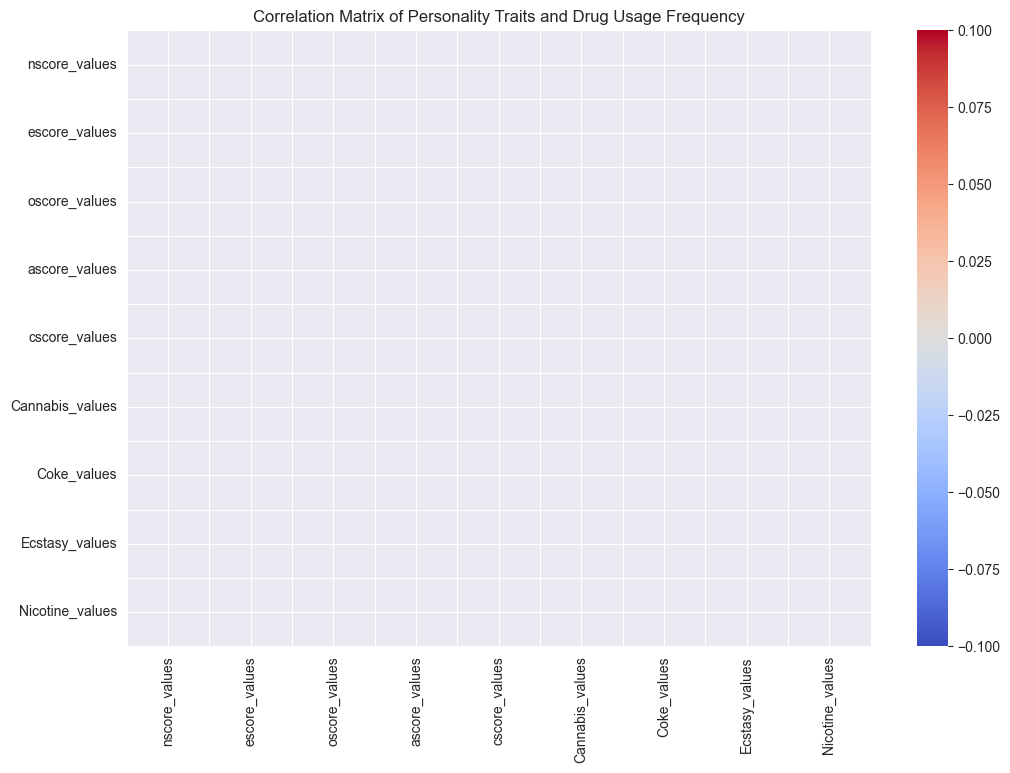


Significant Correlations (p-value < 0.05):
                  nscore_values  escore_values  oscore_values  ascore_values  \
nscore_values              NaN            NaN            NaN            NaN   
escore_values              NaN            NaN            NaN            NaN   
oscore_values              NaN            NaN            NaN            NaN   
ascore_values              NaN            NaN            NaN            NaN   
cscore_values              NaN            NaN            NaN            NaN   
Cannabis_values            NaN            NaN            NaN            NaN   
Coke_values                NaN            NaN            NaN            NaN   
Ecstasy_values             NaN            NaN            NaN            NaN   
Nicotine_values            NaN            NaN            NaN            NaN   

                 cscore_values  Cannabis_values  Coke_values  Ecstasy_values  \
nscore_values              NaN              NaN          NaN             NaN   
esco

In [722]:
# Define the columns for personality traits and drug usage
personality_traits = ['nscore_values', 'escore_values', 'oscore_values', 'ascore_values', 'cscore_values']
drug_usage = ['Cannabis_values', 'Coke_values', 'Ecstasy_values', 'Nicotine_values']

# Mapping drug usage categories to numerical values
usage_mapping = {
    "Never Used": 0, "Used over a Decade Ago": 1, "Used in Last Decade": 2,
    "Used in Last Year": 3, "Used in Last Month": 4, "Used in Last Week": 5,
    "Used in Last Day": 6
}

# Apply the mapping to the drug usage columns
for col in drug_usage:
    df.loc[:, col] = df[col].map(usage_mapping)

# Ensure all relevant columns are numeric
for col in personality_traits + drug_usage:
    df.loc[:, col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values in the selected columns
data_clean = df.dropna(subset=personality_traits + drug_usage)

# Calculate the correlation matrix
correlation_matrix = data_clean[personality_traits + drug_usage].corr()

# Function to calculate p-values
def calculate_pvalues(df):
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            if df[r].isnull().all() or df[c].isnull().all() or len(df[r].unique()) <= 1 or len(df[c].unique()) <= 1:
                pvalues.loc[r, c] = None
            else:
                pvalues.loc[r, c] = round(pearsonr(df[r].dropna(), df[c].dropna())[1], 4)
    return pvalues

# Calculate p-values for the correlations
pvalues = calculate_pvalues(data_clean[personality_traits + drug_usage])

# Display the correlation matrix and p-values
print("Correlation Matrix:\n", correlation_matrix)
print("\nP-Values Matrix:\n", pvalues)

# Plot the correlation matrix with heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Personality Traits and Drug Usage Frequency')
plt.show()

# Identify significant correlations (p-value < 0.05)
significant_correlations = correlation_matrix.copy()
for row in significant_correlations.index:
    for col in significant_correlations.columns:
        if pvalues.at[row, col] is None or pvalues.at[row, col] >= 0.05:
            significant_correlations.at[row, col] = None

print("\nSignificant Correlations (p-value < 0.05):\n", significant_correlations)

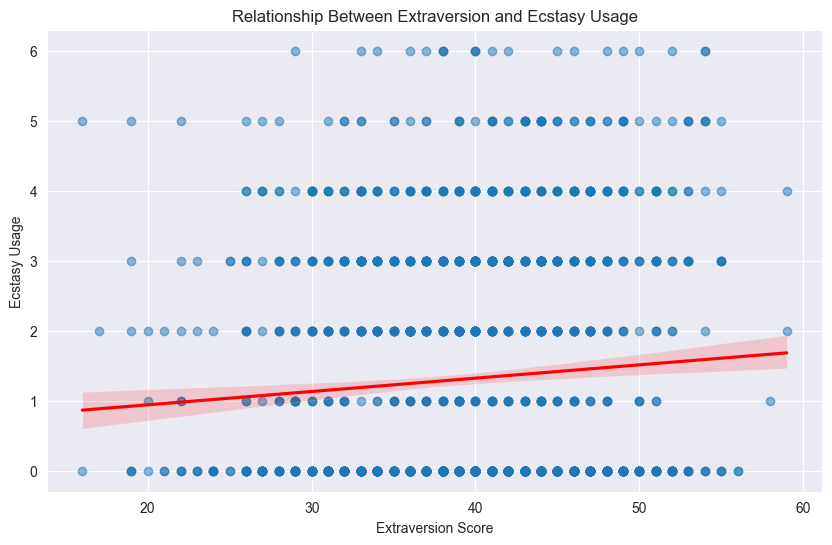

Correlation coefficient between Extraversion and Ecstasy usage: 0.07768092734006418


In [712]:
# Define the relevant columns
extraversion_col = 'escore_values'
ecstasy_col = 'Ecstasy_values'

# Mapping drug usage categories to numerical values
usage_mapping = {
    "Never Used": 0, "Used over a Decade Ago": 1, "Used in Last Decade": 2,
    "Used in Last Year": 3, "Used in Last Month": 4, "Used in Last Week": 5,
    "Used in Last Day": 6
}

# Apply the mapping to the Ecstasy usage column
df[ecstasy_col] = df[ecstasy_col].map(usage_mapping)

# Ensure the relevant columns are numeric
df[extraversion_col] = pd.to_numeric(df[extraversion_col], errors='coerce')
df[ecstasy_col] = pd.to_numeric(df[ecstasy_col], errors='coerce')

# Drop rows with missing values in the selected columns
data_clean = df.dropna(subset=[extraversion_col, ecstasy_col])

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=extraversion_col, y=ecstasy_col, data=data_clean, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.xlabel('Extraversion Score')
plt.ylabel('Ecstasy Usage')
plt.title('Relationship Between Extraversion and Ecstasy Usage')
plt.show()

# Calculate and display the correlation coefficient
correlation_coefficient = data_clean[extraversion_col].corr(data_clean[ecstasy_col])
print(f'Correlation coefficient between Extraversion and Ecstasy usage: {correlation_coefficient}')

In [716]:
# Calculate and display the Spearman correlation coefficient
spearman_corr, _ = spearmanr(data_clean[extraversion_col], data_clean[ecstasy_col])
print(f'Spearman correlation coefficient between Extraversion and Ecstasy usage: {spearman_corr}')

Spearman correlation coefficient between Extraversion and Ecstasy usage: 0.06411137049356694


##  TASK 2.3: Q3 - 

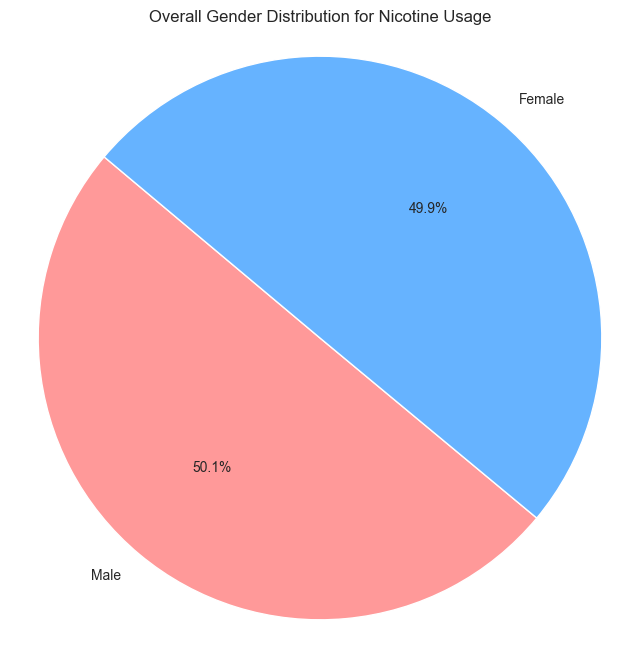

/usr/local/anaconda3/envs/uts-pdpp/lib/python3.11/site-packages/plotly/express/_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/anaconda3/envs/uts-pdpp/lib/python3.11/site-packages/plotly/express/_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [702]:
# Question 3: Gender Distribution in Drug Usage Frequency
# Pie Chart for Nicotine Usage by Gender
nicotine_gender_distribution = df['gender_values'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(nicotine_gender_distribution, labels=nicotine_gender_distribution.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Overall Gender Distribution for Nicotine Usage')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Sunburst Chart for Nicotine Usage by Gender
sunburst_data = df[['gender_values', 'Nicotine_values']].copy()
sunburst_data['count'] = 1
fig = px.sunburst(sunburst_data, path=['gender_values', 'Nicotine_values'], values='count',
                  color='gender_values', color_discrete_map={'Female':'#ff9999', 'Male':'#66b3ff'},
                  title='Sunburst Chart of Nicotine Usage Frequency by Gender')
fig.show()